# Business Case - Yulu (Hypothesis Testing)

---
---

## Defining Problem Statement

Yulu, India’s leading micro-mobility service provider, has recently suffered considerable dips in its revenues. They want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

The company wished to know which variables are significant in predicting the demand for shared electric cycles in the Indian market and how well those variables describe the electric cycle demands.

It is important for the company to have the knowledge of the demand factors in this Indian market in order to tailor their services and strategies accordingly.

The company can benefit by data-driven solutions and actional insights to help boost its revenue. This will help it make
informed adjustments to regain profitability.

## Import the necessary libraries

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from scipy.stats import norm

import os
import warnings
warnings.filterwarnings('ignore')

---

## 1. Read the data set and store it as a data frame

In [2]:
#Get the current working directory
os.getcwd()

'C:\\Users\\user\\OneDrive\\Desktop\\Scaler DSML\\Business Cases\\Business Case - Yulu'

In [3]:
#Set working directory to desired folder
os.chdir('C:\\Users\\user\\OneDrive\\Desktop\\Scaler DSML\\Business Cases\\Business Case - Yulu')

In [4]:
#Read the data set and store it is as a data frame
yulu_data = pd.read_csv("bike_sharing.csv")
yulu_data

datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000       3          13     16  
1      13.635        80     0.0000       8          32     40  
2      13.635        80     0.0000       5          27     32  
3      14.395        75     0.0000       3          10     13  
4      14.395        75     0.0000       0           1      1  
...       ...       ...        ...     ...         ...    ...  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88  

[10886 rows x 12 columns]

---

## Get a preliminary understanding of the structure of the data

In [5]:
yulu_data.head(n=10)

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1   9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1   9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1   9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1   9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1   9.84  14.395   
5  2011-01-01 05:00:00       1        0           0        2   9.84  12.880   
6  2011-01-01 06:00:00       1        0           0        1   9.02  13.635   
7  2011-01-01 07:00:00       1        0           0        1   8.20  12.880   
8  2011-01-01 08:00:00       1        0           0        1   9.84  14.395   
9  2011-01-01 09:00:00       1        0           0        1  13.12  17.425   

   humidity  windspeed  casual  registered  count  
0        81     0.0000       3          13     16  
1        80     0.0000       8          32     40  
2        80     0.0000       5          27     32  
3        75     0.0000       3          10     13  
4        75     0.0000       0           1      1  
5        75     6.0032       0           1      1  
6        80     0.0000       2           0      2  
7        86     0.0000       1           2      3  
8        75     0.0000       1           7      8  
9        76     0.0000       8           6     14

In [6]:
yulu_data.tail(n=10)

datetime  season  holiday  workingday  weather   temp  \
10876  2012-12-19 14:00:00       4        0           1        1  17.22   
10877  2012-12-19 15:00:00       4        0           1        1  17.22   
10878  2012-12-19 16:00:00       4        0           1        1  17.22   
10879  2012-12-19 17:00:00       4        0           1        1  16.40   
10880  2012-12-19 18:00:00       4        0           1        1  15.58   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
10876  21.210        50    12.9980      33         185    218  
10877  21.210        50    19.0012      28         209    237  
10878  21.210        50    23.9994      37         297    334  
10879  20.455        50    26.0027      26         536    562  
10880  19.695        50    23.9994      23         546    569  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88

In [7]:
yulu_data.shape

(10886, 12)

<ins>Observations</ins>
- There are 10,886 rows and 12 columns in the data set.

In [8]:
yulu_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [9]:
yulu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


<ins>Observations</ins>
- The 'datetime' column is read as object type. It is useful to convert this to the pandas datetime type.
- The continuous variables in this data set are the columns 'temp', 'atemp', 'humidity', 'windspeed'.
- The discrete numerical variables in this data set are 'casual, 'registered' and 'count'. However, it is possible to treat them as continuous variables due to the large range of possible values.
- Although 'season', 'holiday', 'workingday' and 'weather' are read as an integer type variables, practically speaking, the numbers represents different non-numerical values/categories. Retaining them as integer type is not logical as no meaningful mathematical operations can be performed on their values.

---

## Basic Analysis - Data Preprocessing

### Changing the data type of columns where appropriate

In [10]:
yulu_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [11]:
#Converting the 'datetime' column to the pandas datetime format
yulu_data['datetime'] = pd.to_datetime(yulu_data['datetime'])

In [12]:
#Converting the 'season', 'holiday', 'workingday' and 'weather' columns to the category type as there are only a 
#few number unique values expected for each
yulu_data['season'] = yulu_data['season'].astype('category')
yulu_data['holiday'] = yulu_data['holiday'].astype('category')
yulu_data['workingday'] = yulu_data['workingday'].astype('category')
yulu_data['weather'] = yulu_data['weather'].astype('category')

In [13]:
yulu_data.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

### Missing value detection

In [14]:
#Get a count of the number of the missing values in each column of the data set
yulu_data.isna().sum(axis=0)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<ins>Observations</ins>
- There are no missing values in any column of the data set. Hence, no missing value handling steps such as dropping rows/columns, or imputation are necessary.

### Check for duplicate records

In [15]:
yulu_data.duplicated().sum(axis=0)

0

<ins>Observations</ins>
- There are no duplicate records in the data set. Every row is unique.

---

## Outlier detection and handling for the numerical variables

In [16]:
#Get a numerical summary description of all the numerical variables
yulu_data.describe()

temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159      8.474601     19.245033      8.164537     49.960477   
min        0.82000      0.760000      0.000000      0.000000      0.000000   
25%       13.94000     16.665000     47.000000      7.001500      4.000000   
50%       20.50000     24.240000     62.000000     12.998000     17.000000   
75%       26.24000     31.060000     77.000000     16.997900     49.000000   
max       41.00000     45.455000    100.000000     56.996900    367.000000   

         registered         count  
count  10886.000000  10886.000000  
mean     155.552177    191.574132  
std      151.039033    181.144454  
min        0.000000      1.000000  
25%       36.000000     42.000000  
50%      118.000000    145.000000  
75%      222.000000    284.000000  
max      886.000000    977.000000

In [17]:
#Create a function to provide the five-number summary (minimum, first quartile, median, third quartile, maximum) and IQR
def numerical_summary(col_name):
    col_desc=yulu_data[col_name].describe()
    print(f"Minimum={col_desc['min']}, Q1={col_desc['25%']}, Median={col_desc['50%']}, Q3={col_desc['75%']}, Maximum={col_desc['max']}")
    print("IQR=",col_desc['75%']-col_desc['25%']) 

In [18]:
#Create a function to detect the outliers
def detect_outliers(col_name):
    col_desc=yulu_data[col_name].describe()
    col_IQR=col_desc['75%']-col_desc['25%']
    outliers=yulu_data[(yulu_data[col_name]<col_desc['25%']-1.5*col_IQR) | \
                          (yulu_data[col_name]>col_desc['75%']+1.5*col_IQR)][col_name].sort_values()
    print(outliers.to_list())
    print("Number of outliers :",outliers.count())
    print("Number of unique outliers :",outliers.nunique())

In [19]:
#Create a function to generate the boxplot of a particular column
def show_boxplot(col_name):
    sns.boxplot(y=col_name,data=yulu_data)
    plt.title(f"Boxplot of the {col_name} variable")
    plt.ylabel(col_name)
    plt.show()

### temp

In [20]:
#Get the five-number summary (minimum, first quartile, median, third quartile, maximum) and IQR for 'temp'
numerical_summary("temp")

Minimum=0.82, Q1=13.94, Median=20.5, Q3=26.24, Maximum=41.0
IQR= 12.299999999999999


In [21]:
#Finding the outliers in the 'temp' variable using the 1.5*IQR method
detect_outliers("temp")

[]
Number of outliers : 0
Number of unique outliers : 0


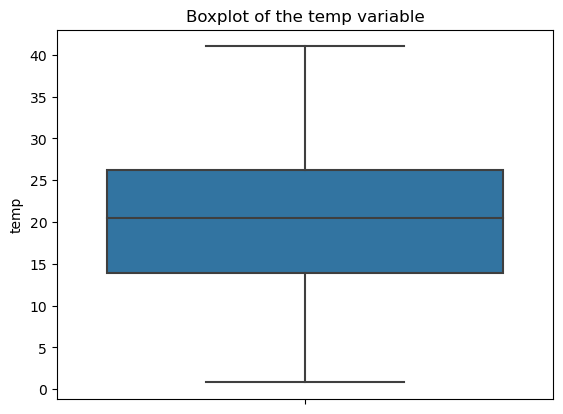

In [22]:
#Boxplot of the 'temp' variable
show_boxplot("temp")

<ins>Observations</ins>
- There are no outliers in the 'temp' variable

### atemp

In [23]:
#Get the five-number summary (minimum, first quartile, median, third quartile, maximum) and IQR for 'atemp'
numerical_summary("atemp")

Minimum=0.76, Q1=16.665, Median=24.24, Q3=31.06, Maximum=45.455
IQR= 14.395


In [24]:
#Finding the outliers in the 'atemp' variable using the 1.5*IQR method
detect_outliers("atemp")

[]
Number of outliers : 0
Number of unique outliers : 0


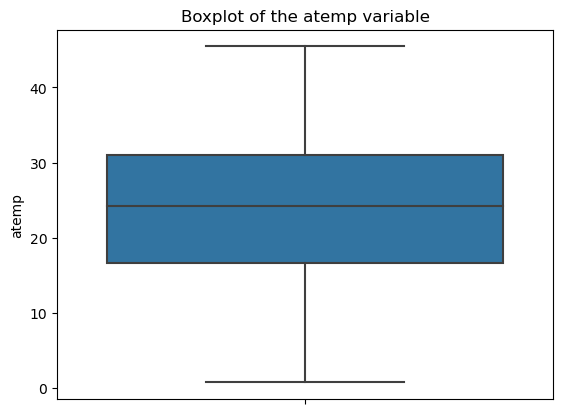

In [25]:
#Boxplot of the 'atemp' variable
show_boxplot("atemp")

<ins>Observations</ins>
- There are no outliers in the 'atemp' variable

### humidity

In [26]:
#Get the five-number summary (minimum, first quartile, median, third quartile, maximum) and IQR for 'humidity'
numerical_summary("humidity")

Minimum=0.0, Q1=47.0, Median=62.0, Q3=77.0, Maximum=100.0
IQR= 30.0


In [27]:
#Finding the outliers in the 'humidity' variable using the 1.5*IQR method
detect_outliers("humidity")

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Number of outliers : 22
Number of unique outliers : 1


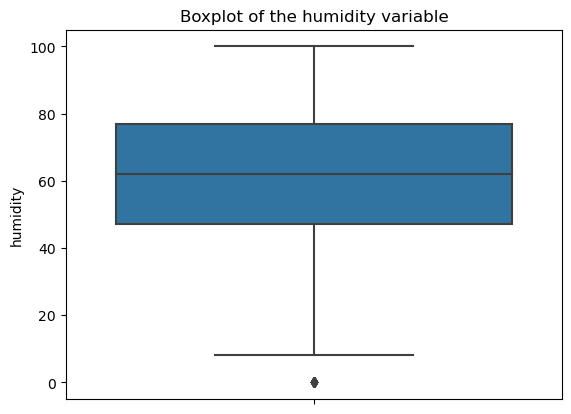

In [28]:
#Boxplot of the 'humidity' variable
show_boxplot("humidity")

<ins>Observations</ins>
- There is one unique outlier in the humidity variable - the value 0.

In [29]:
#Limit the values in the 'humidity' column to between the 5th percentile and 95th percentile
yulu_data["humidity"]=np.clip(yulu_data["humidity"],yulu_data["humidity"].quantile(0.05),
                                        yulu_data["humidity"].quantile(0.95))

### windspeed

In [30]:
#Get the five-number summary (minimum, first quartile, median, third quartile, maximum) and IQR for 'windspeed'
numerical_summary("windspeed")

Minimum=0.0, Q1=7.0015, Median=12.998, Q3=16.9979, Maximum=56.9969
IQR= 9.996400000000001


In [31]:
#Finding the outliers in the 'windspeed' variable using the 1.5*IQR method
detect_outliers("windspeed")

[32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 32.9975, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 35.0008, 

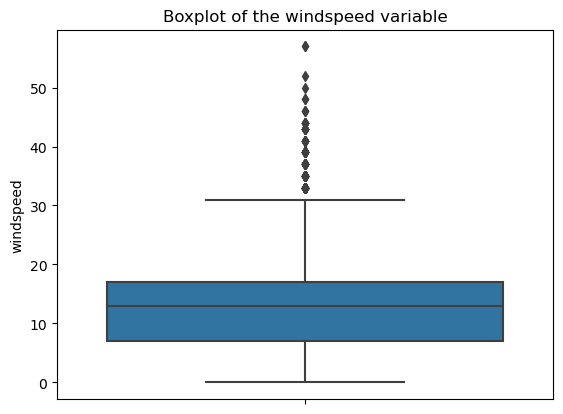

In [32]:
#Boxplot of the 'windspeed' variable
show_boxplot("windspeed")

<ins>Observations</ins>
- There are 12 unique outliers in the wind speed values. All of them are in the upper tail of the distribution.

In [33]:
#Limit the values in the 'windspeed' column to between the 5th percentile and 95th percentile
yulu_data["windspeed"]=np.clip(yulu_data["windspeed"],yulu_data["windspeed"].quantile(0.05),
                                        yulu_data["windspeed"].quantile(0.95))

### casual

In [34]:
#Get the five-number summary (minimum, first quartile, median, third quartile, maximum) and IQR for 'casual'
numerical_summary("casual")

Minimum=0.0, Q1=4.0, Median=17.0, Q3=49.0, Maximum=367.0
IQR= 45.0


In [35]:
#Finding the outliers in the 'casual' variable using the 1.5*IQR method
detect_outliers("casual")

[117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 118, 118, 118, 118, 118, 118, 118, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 122, 122, 122, 122, 122, 122, 122, 122, 122, 123, 123, 123, 123, 123, 123, 123, 123, 123, 124, 124, 124, 124, 124, 124, 124, 125, 125, 125, 125, 125, 125, 125, 125, 125, 126, 126, 126, 126, 127, 127, 127, 127, 127, 127, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 130, 130, 130, 130, 130, 130, 131, 131, 131, 131, 131, 131, 131, 131, 132, 132, 132, 132, 132, 132, 132, 132, 132, 133, 133, 133, 133, 133, 133, 133, 133, 134, 134, 134, 134, 134, 134, 134, 134, 135, 135, 135, 135, 135, 136, 136, 137, 137, 137, 137, 138, 138, 138, 138, 138, 138, 138, 138, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 140, 140, 140, 140, 141,

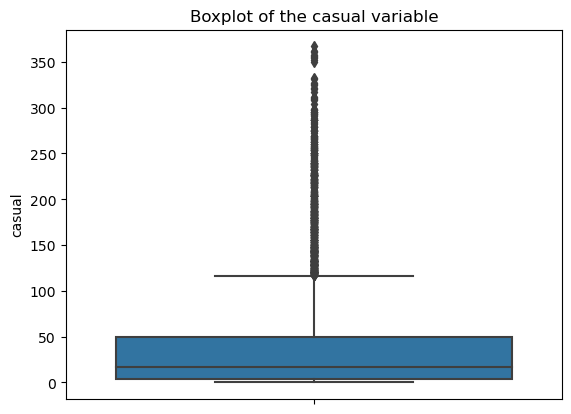

In [36]:
#Boxplot of the 'casual' variable
show_boxplot("casual")

<ins>Observations</ins>
- There are 192 unique outliers in the 'casual' variable. All of them are in the upper tail of the distribution.

In [37]:
#Limit the values in the 'casual' column to between the 5th percentile and 95th percentile
yulu_data["casual"]=np.clip(yulu_data["casual"],yulu_data["casual"].quantile(0.05),
                                        yulu_data["casual"].quantile(0.95))

### registered

In [38]:
#Get the five-number summary (minimum, first quartile, median, third quartile, maximum) and IQR for 'registered'
numerical_summary("registered")

Minimum=0.0, Q1=36.0, Median=118.0, Q3=222.0, Maximum=886.0
IQR= 186.0


In [39]:
#Finding the outliers in the 'registered' variable using the 1.5*IQR method
detect_outliers("registered")

[502, 503, 503, 504, 504, 504, 504, 505, 505, 505, 506, 506, 506, 507, 507, 507, 508, 508, 508, 509, 509, 510, 510, 510, 510, 511, 512, 512, 512, 513, 514, 514, 514, 514, 515, 515, 515, 516, 516, 516, 516, 517, 517, 518, 521, 522, 523, 523, 523, 523, 525, 525, 525, 527, 527, 529, 529, 530, 530, 531, 531, 532, 532, 533, 533, 533, 533, 533, 534, 534, 534, 536, 536, 537, 538, 539, 539, 539, 539, 539, 540, 540, 540, 540, 540, 540, 541, 542, 542, 543, 543, 543, 544, 544, 545, 545, 546, 546, 547, 547, 547, 548, 548, 549, 549, 551, 551, 552, 553, 553, 554, 554, 554, 555, 556, 557, 557, 557, 558, 559, 560, 561, 562, 563, 563, 564, 564, 564, 564, 565, 566, 567, 567, 568, 570, 571, 571, 572, 572, 573, 573, 575, 575, 575, 576, 576, 577, 578, 578, 579, 579, 580, 580, 580, 581, 581, 582, 582, 583, 584, 586, 586, 586, 589, 591, 593, 594, 594, 595, 595, 596, 596, 597, 598, 598, 601, 601, 602, 602, 603, 603, 604, 604, 604, 605, 605, 608, 608, 609, 610, 613, 614, 615, 615, 616, 617, 617, 617, 618, 618,

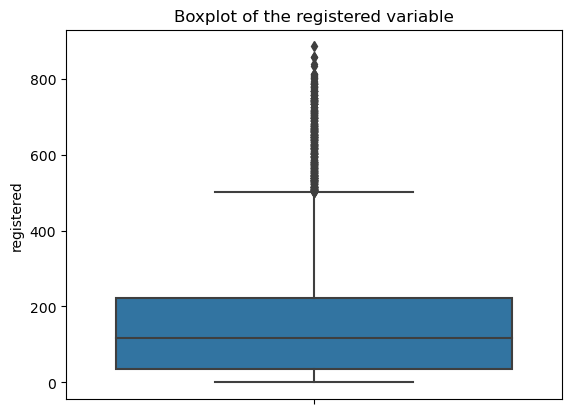

In [40]:
#Boxplot of the 'registered' variable
show_boxplot("registered")

<ins>Observations</ins>
- There are 232 unique outliers in the 'registered' variable. All of them are in the upper tail of the distribution.

In [41]:
#Limit the values in the 'registered' column to between the 5th percentile and 95th percentile
yulu_data["registered"]=np.clip(yulu_data["registered"],yulu_data["registered"].quantile(0.05),
                                        yulu_data["registered"].quantile(0.95))

### count

In [42]:
#Get the five-number summary (minimum, first quartile, median, third quartile, maximum) and IQR for 'count'
numerical_summary("count")

Minimum=1.0, Q1=42.0, Median=145.0, Q3=284.0, Maximum=977.0
IQR= 242.0


In [43]:
#Finding the outliers in the 'count' variable using the 1.5*IQR method
detect_outliers("count")

[648, 648, 649, 649, 650, 651, 651, 651, 652, 653, 653, 653, 654, 654, 654, 654, 655, 656, 656, 657, 658, 659, 659, 659, 660, 661, 662, 662, 662, 662, 663, 665, 666, 667, 668, 668, 668, 668, 668, 668, 669, 669, 670, 671, 671, 671, 671, 672, 672, 673, 673, 673, 674, 674, 676, 676, 677, 677, 678, 678, 678, 678, 678, 678, 679, 679, 679, 679, 680, 680, 681, 681, 681, 681, 681, 682, 682, 683, 684, 684, 685, 686, 686, 686, 686, 687, 687, 688, 689, 689, 690, 691, 692, 692, 692, 693, 693, 694, 694, 694, 696, 698, 698, 700, 701, 702, 702, 704, 704, 704, 704, 705, 705, 706, 706, 708, 710, 710, 710, 711, 712, 712, 713, 713, 713, 713, 715, 715, 717, 719, 719, 721, 721, 722, 723, 723, 724, 724, 724, 725, 729, 729, 729, 729, 730, 730, 730, 730, 731, 731, 732, 733, 734, 737, 737, 738, 738, 739, 741, 743, 743, 743, 743, 744, 744, 744, 745, 745, 746, 747, 748, 749, 750, 755, 757, 757, 758, 759, 759, 761, 766, 766, 767, 769, 770, 770, 770, 771, 772, 772, 774, 775, 776, 777, 779, 781, 782, 782, 783, 784,

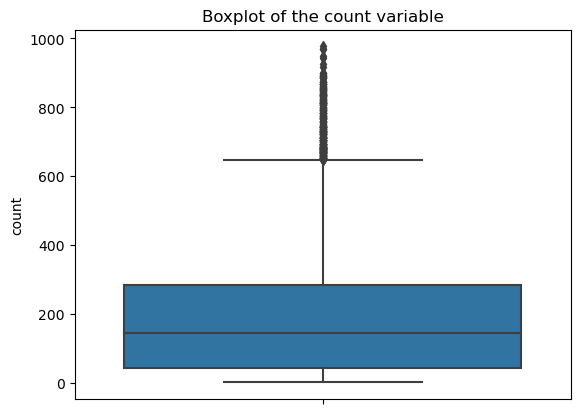

In [44]:
#Boxplot of the 'count' variable
show_boxplot("count")

<ins>Observations</ins>
- There are 180 unique outliers in the 'count' variable. All of them are in the upper tail of the distribution.

In [45]:
#Limit the values in the 'count' column to between the 5th percentile and 95th percentile
yulu_data["count"]=np.clip(yulu_data["count"],yulu_data["count"].quantile(0.05),
                                        yulu_data["count"].quantile(0.95))

---

## Univariate analysis of the categorical columns

In [46]:
#Summary measures for all the categorical columns
yulu_data.describe(include='category')

season  holiday  workingday  weather
count    10886    10886       10886    10886
unique       4        2           2        4
top          4        0           1        1
freq      2734    10575        7412     7192

In [47]:
#Create a function to display the countplot and pie chart for a categorical column
def visualize_cat_variable(col_name):
    fig, ax = plt.subplots(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.countplot(x=col_name,data=yulu_data)
    plt.title(f"Countplot of the {col_name} variable")

    plt.subplot(1,2,2)
    plt.pie(x=yulu_data[col_name].value_counts().values,labels=yulu_data[col_name].value_counts().index,autopct='%2.1f%%')
    plt.title(f"Pie chart of the {col_name} variable")
    plt.show()

### season

In [48]:
#Get the number of unqiue values of the 'season' column
yulu_data["season"].nunique()

4

In [49]:
#Get the unique values of the 'season' column
yulu_data["season"].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [50]:
#Get the counts of each unique value of the 'season' column
yulu_data["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

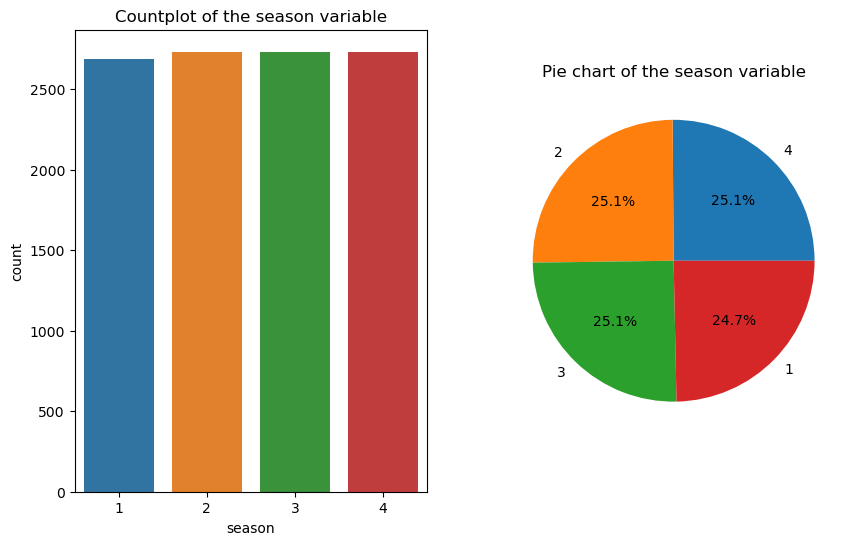

In [51]:
#Visualize the countplot and pie chart for the 'season' column
visualize_cat_variable("season")

<ins>Observations</ins>
- Each of the four seasons - spring (1), summer (2), fall (3) and winter (4) are equally represented in the data set. This may indicate a uniform distribution in the bike rentals throughout the year.

### holiday

In [52]:
#Get the number of unqiue values of the 'holiday' column
yulu_data["holiday"].nunique()

2

In [53]:
#Get the unique values of the 'holiday' column
yulu_data["holiday"].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [54]:
#Get the counts of each unique value of the 'holiday' column
yulu_data["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

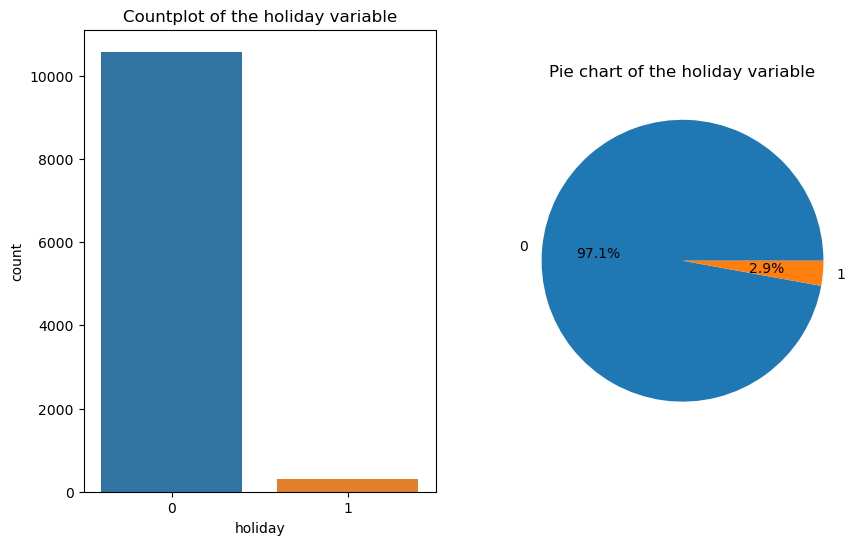

In [55]:
#Visualize the countplot and pie chart for the 'holiday' column
visualize_cat_variable("holiday")

<ins>Observations</ins>
- As expected, an overwhelming majority of bike rentals on non-holidays.

### workingday

In [56]:
#Get the number of unqiue values of the 'workingday' column
yulu_data["workingday"].nunique()

2

In [57]:
#Get the unique values of the 'workingday' column
yulu_data["workingday"].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [58]:
#Get the counts of each unique value of the 'workingday' column
yulu_data["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

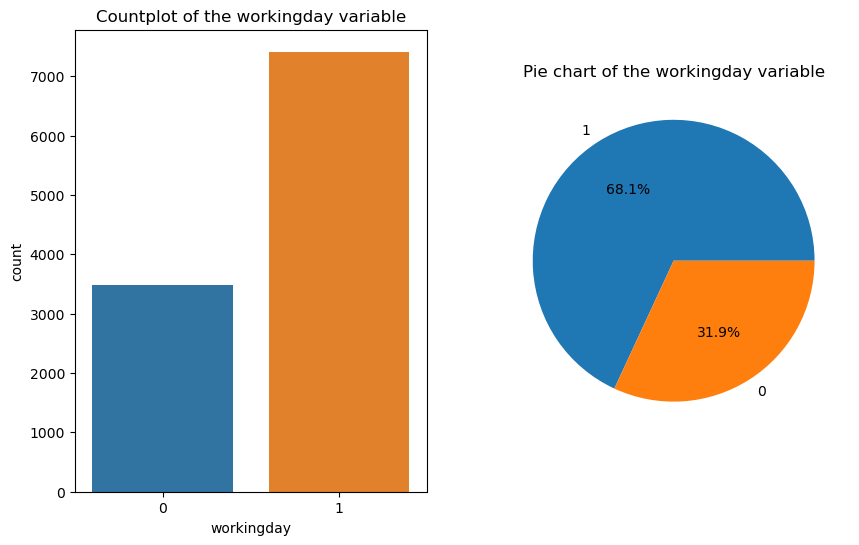

In [59]:
#Visualize the countplot and pie chart for the 'workingday' column
visualize_cat_variable("workingday")

<ins>Observations</ins>
- A large majority of the bike rentals occur working days. This may indicate that a large percentage of customers use Yulu bikes to commute to work.

### weather

In [60]:
#Get the number of unqiue values of the 'weather' column
yulu_data["weather"].nunique()

4

In [61]:
#Get the unique values of the 'weather' column
yulu_data["weather"].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [62]:
#Get the counts of each unique value of the 'weather' column
yulu_data["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

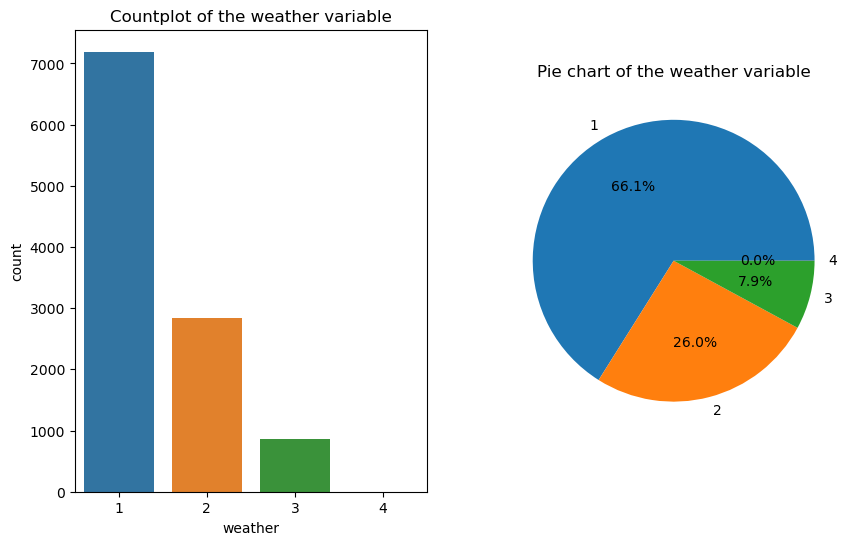

In [63]:
#Visualize the countplot and pie chart for the 'weather' column
visualize_cat_variable("weather")

<ins>Observations</ins>
- The vast majority (about 66.1%) of bike rentals happen during periods with weather 1.
- The second highest bike rentals (26.0%) take place during periods with misty days.
- About 7.9% of bikes are rended during periods with light rain or snow.
- No bikes are rented during periods with heavy rain or snow.

All these indicate that the overhead weather is an important factor affecting bike rentals.

---

## Univariate analysis of the numerical columns

In [64]:
#Summary measures for all the numerical columns
yulu_data.describe()

temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     62.062098     12.575305     32.953702   
std        7.79159      8.474601     18.419373      7.599447     39.180719   
min        0.82000      0.760000     31.000000      0.000000      0.000000   
25%       13.94000     16.665000     47.000000      7.001500      4.000000   
50%       20.50000     24.240000     62.000000     12.998000     17.000000   
75%       26.24000     31.060000     77.000000     16.997900     49.000000   
max       41.00000     45.455000     93.000000     27.999300    141.000000   

         registered         count  
count  10886.000000  10886.000000  
mean     148.954069    185.689119  
std      131.232765    164.591139  
min        4.000000      5.000000  
25%       36.000000     42.000000  
50%      118.000000    145.000000  
75%      222.000000    284.000000  
max      464.000000    563.750000

In [65]:
#Create a function to plot the histogram and KDE plot for a numerical column
def visualize_num_variable(col_name,labl,binw=None):
    sns.histplot(x=col_name,data=yulu_data,binwidth=binw,kde=True)
    plt.title(f"Histogram and KDE plot of the {labl}")
    plt.xlabel(labl)
    plt.show()

### temp

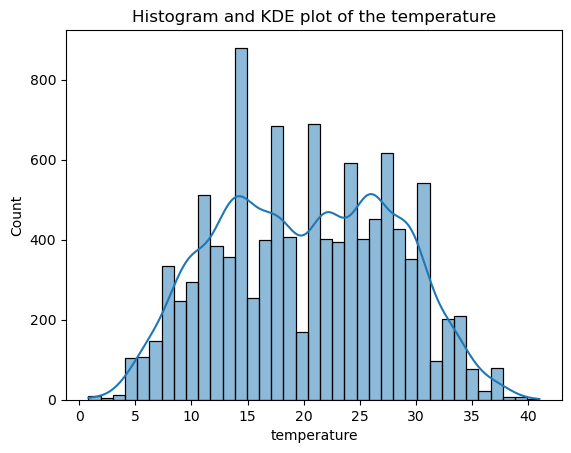

In [66]:
#Histogram and KDE plot of the temperature
visualize_num_variable("temp","temperature")

<ins>Observations</ins>
- The histogram and KDE plot show a fairly symmetrical distribution in the temperatures during which Yulu bikes were rented. The peak occurs at around 15 degree Celsius.
- Most bike rentals occurred during moderate temperatures, with lower volumes in very cold or hot conditions. This suggests that temperature could be a factor affecting bike rentals.

### atemp

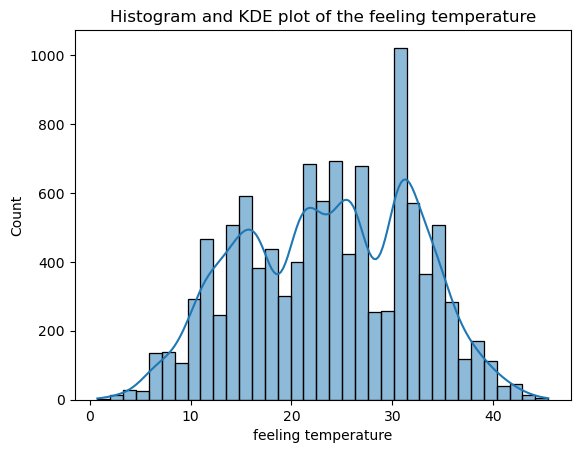

In [67]:
#Histogram and KDE plot of the feeling temperature
visualize_num_variable("atemp","feeling temperature")

<ins>Observations</ins>
- The histogram and KDE plot show a fairly symmetrical distribution in the feeling temperatures during which Yulu bikes were rented. The peak occurs at around 30 degree Celsius.
- Most bike rentals occurred during moderate temperatures, with lower volumes in very cold or hot conditions. This suggests that feeling temperature could be a factor affecting bike rentals.

### humidity

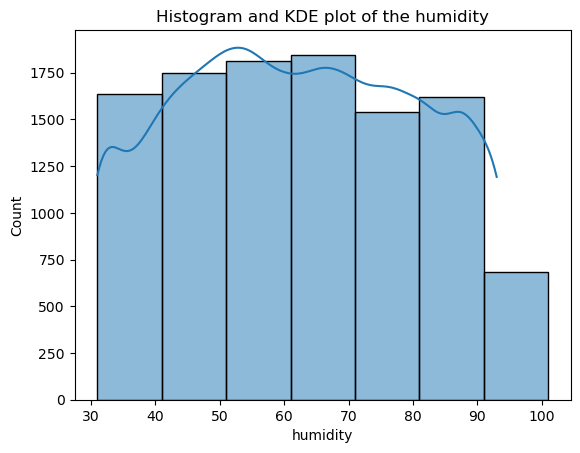

In [68]:
#Histogram and KDE plot of the humidity
visualize_num_variable("humidity","humidity",10)

<ins>Observations</ins>
- There are some fluctuations in the distribution of humidity values, an a right-skew in the distribution is noticeable.

### windspeed

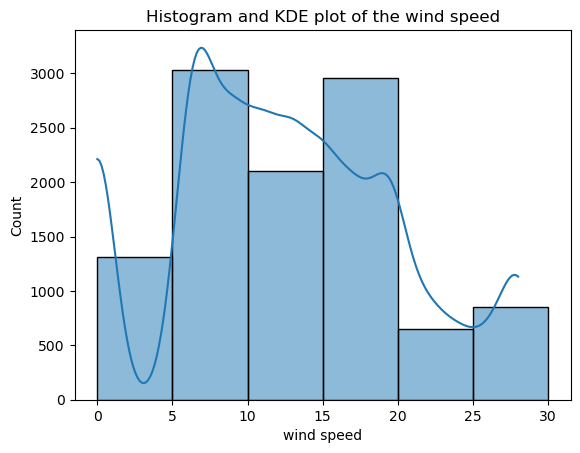

In [69]:
#Histogram and KDE plot of the wind speed
visualize_num_variable("windspeed","wind speed",5)

<ins>Observations</ins>
- Most bike rentals were done during periods of moderate wind speed.

### casual

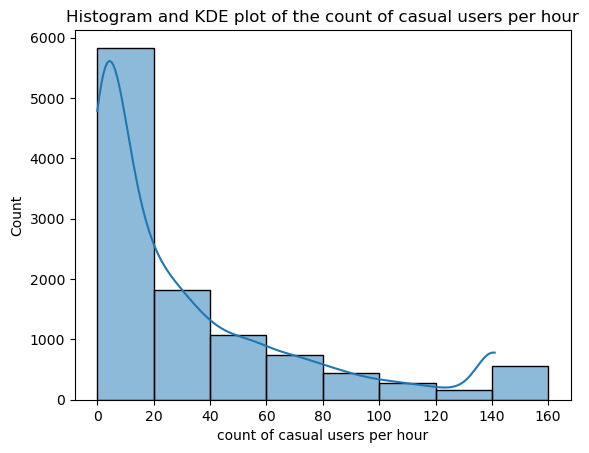

In [70]:
#Histogram and KDE plot of the count of casual users per hour
visualize_num_variable("casual","count of casual users per hour",20)

<ins>Observations</ins>
- There is an observable right-skew in the distribution of bike rentals per hour by casual users, indicating that during most hours, the volumes are in the <20 range, which then progressively decreases.

### registered

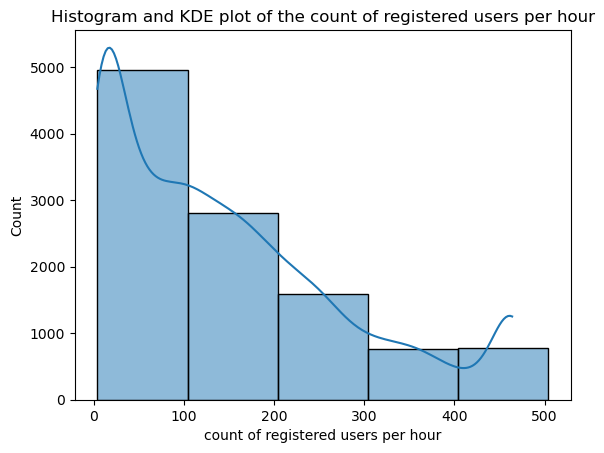

In [71]:
#Histogram and KDE plot of the count of registered users per hour
visualize_num_variable("registered","count of registered users per hour",100)

<ins>Observations</ins>
- There is an observable right-skew in the distribution of bike rentals per hour by registered users, indicating that during most hours, the columes are in the <100 range, which then progressively decreases.

### count

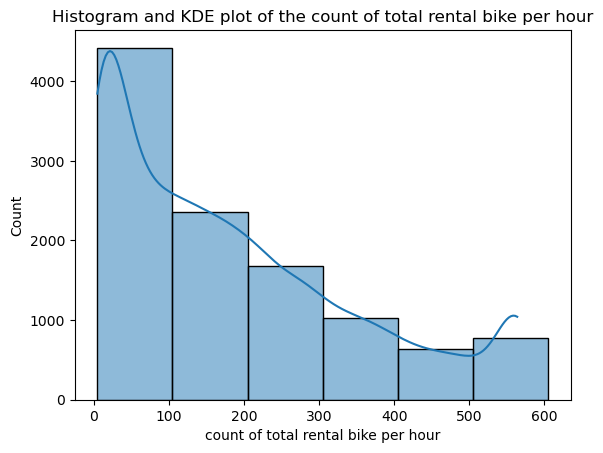

In [72]:
#Histogram and KDE plot of the count of total rental bikes
visualize_num_variable("count","count of total rental bike per hour",100)

<ins>Observations</ins>
- There is an observable right-skew in the distribution of bike rentals per hour by registered users, indicating that during most hours, the columes are in the <100 range, which then progressively decreases.

---

## Bivariate/Multivariate Analysis

### Correlation analysis between numerical variables

In [73]:
yulu_data.corr()

temp     atemp  humidity  windspeed    casual  registered  \
temp        1.000000  0.984948 -0.064619  -0.012351  0.524380    0.333722   
atemp       0.984948  1.000000 -0.042611  -0.051960  0.517896    0.329985   
humidity   -0.064619 -0.042611  1.000000  -0.320708 -0.376588   -0.293735   
windspeed  -0.012351 -0.051960 -0.320708   1.000000  0.109439    0.107767   
casual      0.524380  0.517896 -0.376588   0.109439  1.000000    0.589091   
registered  0.333722  0.329985 -0.293735   0.107767  0.589091    1.000000   
count       0.404120  0.399762 -0.334454   0.114694  0.744431    0.973646   

               count  
temp        0.404120  
atemp       0.399762  
humidity   -0.334454  
windspeed   0.114694  
casual      0.744431  
registered  0.973646  
count       1.000000

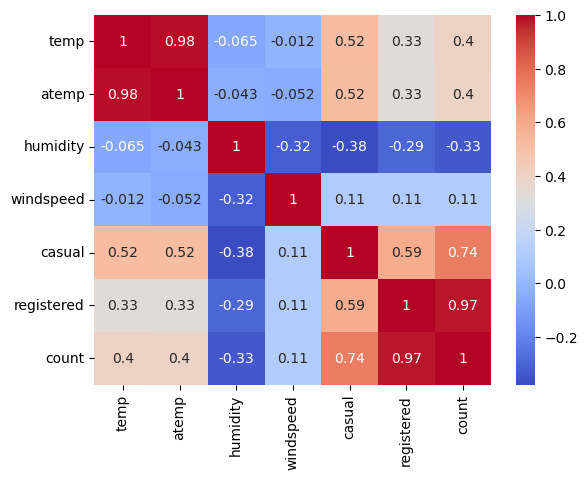

In [74]:
#Get a heatmap showing the correlations between numerical columns in the data
sns.heatmap(yulu_data.corr(),cmap="coolwarm",annot=True)
plt.show()

<ins>Observations</ins>
- There is a high positive correlation between the 'temp' and 'atemp' variables.
- There is a high positive correlation between the 'registered' and 'count' variables.
- There is also a fairly high positive correlation between the 'casual' and 'count' variables.
- The remanining pairs of variables display a low to moderate level of linear correlation.

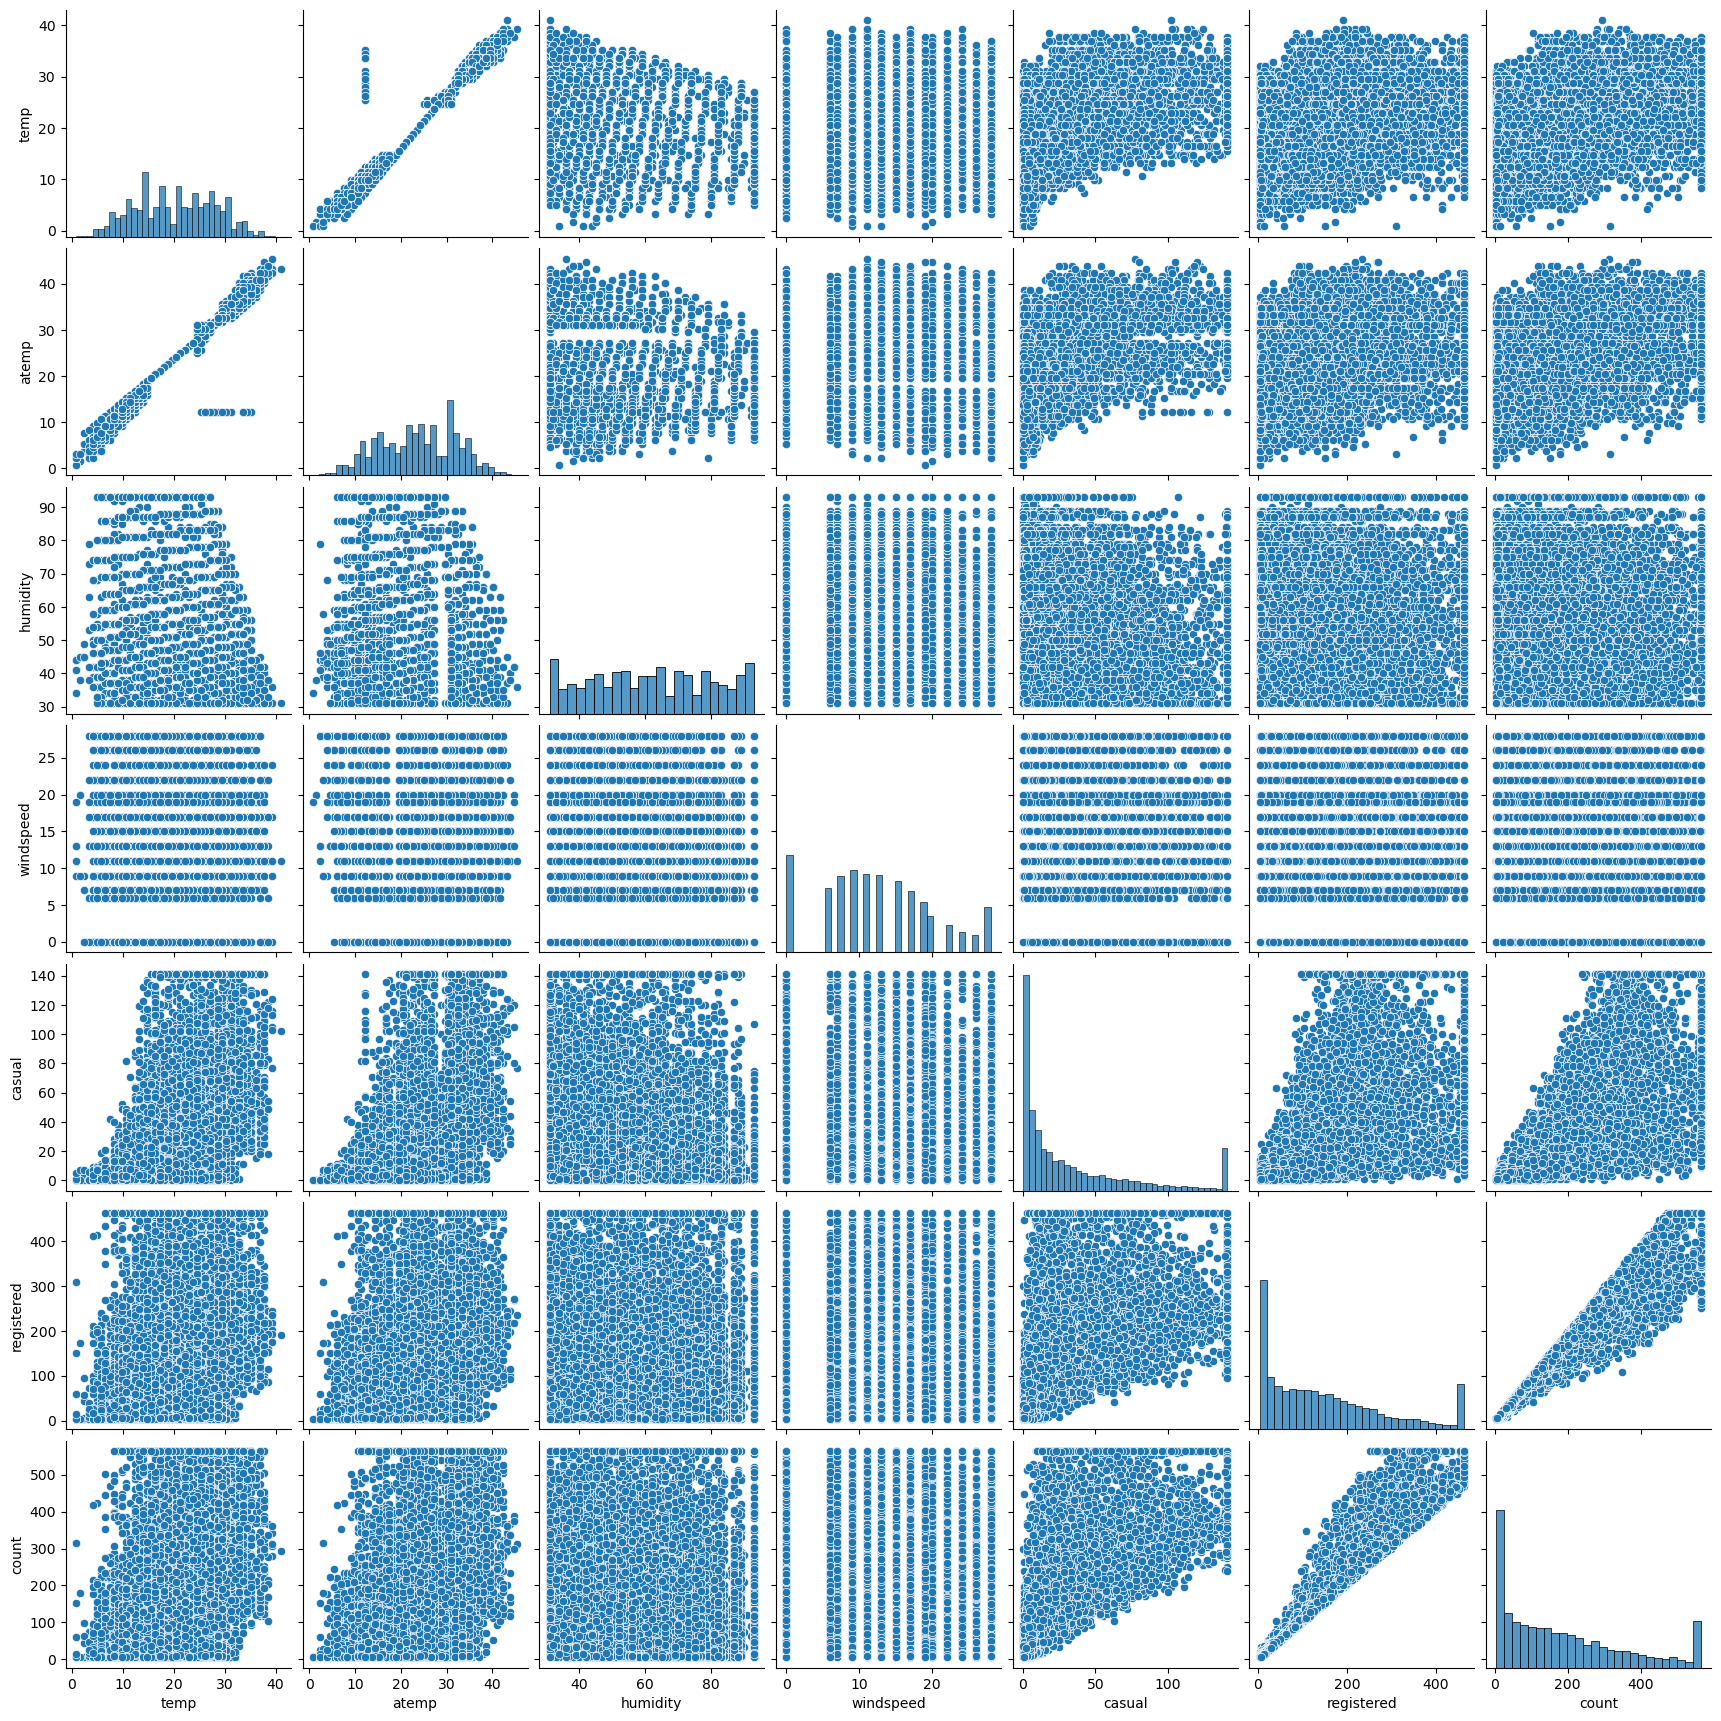

In [75]:
#Pairplot of the numerical columns
sns.pairplot(data=yulu_data)
plt.show()

<ins>Observations</ins>
- The scatterplots confirm a high degree of positive linear correlation between 'temp' and 'atemp', as well as between 'registered' and 'count'.

### Dropping the highly-correlated columns

In [76]:
#Since 'temp' and 'atemp' are high correlated, they are essentially saying the same thing in the context of affecting bike
#rentals. Hence, one of them, i.e., 'atemp' variable is dropped.
yulu_data.drop('atemp',axis=1,inplace=True)

In [77]:
#Since the 'registered' and 'casual' columns show a high degree of correlation with the 'count' variable, and the 'count' 
#variable is essentially the sum of these two columns, dropping them would not result in any signficantly loss of useful
#information
yulu_data.drop(['casual','registered'],axis=1,inplace=True)

In [78]:
yulu_data

datetime season holiday workingday weather   temp  humidity  \
0     2011-01-01 00:00:00      1       0          0       1   9.84        81   
1     2011-01-01 01:00:00      1       0          0       1   9.02        80   
2     2011-01-01 02:00:00      1       0          0       1   9.02        80   
3     2011-01-01 03:00:00      1       0          0       1   9.84        75   
4     2011-01-01 04:00:00      1       0          0       1   9.84        75   
...                   ...    ...     ...        ...     ...    ...       ...   
10881 2012-12-19 19:00:00      4       0          1       1  15.58        50   
10882 2012-12-19 20:00:00      4       0          1       1  14.76        57   
10883 2012-12-19 21:00:00      4       0          1       1  13.94        61   
10884 2012-12-19 22:00:00      4       0          1       1  13.94        61   
10885 2012-12-19 23:00:00      4       0          1       1  13.12        66   

       windspeed  count  
0         0.0000   16.0  
1         0.0000   40.0  
2         0.0000   32.0  
3         0.0000   13.0  
4         0.0000    5.0  
...          ...    ...  
10881    26.0027  336.0  
10882    15.0013  241.0  
10883    15.0013  168.0  
10884     6.0032  129.0  
10885     8.9981   88.0  

[10886 rows x 9 columns]

### Renaming the 'count' column to 'rentals'

In [79]:
#Renaming the 'count' column to 'rentals' to avoid confusion
yulu_data.rename({'count':'rentals'},axis=1,inplace=True)

In [80]:
#Changing the data type of 'rental' column to the integer type
yulu_data['rentals']=yulu_data['rentals'].astype('int32')

In [81]:
yulu_data.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
humidity               int64
windspeed            float64
rentals                int32
dtype: object

In [82]:
yulu_data

datetime season holiday workingday weather   temp  humidity  \
0     2011-01-01 00:00:00      1       0          0       1   9.84        81   
1     2011-01-01 01:00:00      1       0          0       1   9.02        80   
2     2011-01-01 02:00:00      1       0          0       1   9.02        80   
3     2011-01-01 03:00:00      1       0          0       1   9.84        75   
4     2011-01-01 04:00:00      1       0          0       1   9.84        75   
...                   ...    ...     ...        ...     ...    ...       ...   
10881 2012-12-19 19:00:00      4       0          1       1  15.58        50   
10882 2012-12-19 20:00:00      4       0          1       1  14.76        57   
10883 2012-12-19 21:00:00      4       0          1       1  13.94        61   
10884 2012-12-19 22:00:00      4       0          1       1  13.94        61   
10885 2012-12-19 23:00:00      4       0          1       1  13.12        66   

       windspeed  rentals  
0         0.0000       16  
1         0.0000       40  
2         0.0000       32  
3         0.0000       13  
4         0.0000        5  
...          ...      ...  
10881    26.0027      336  
10882    15.0013      241  
10883    15.0013      168  
10884     6.0032      129  
10885     8.9981       88  

[10886 rows x 9 columns]

### Lineplot of the bike rentals by month

In [83]:
rentals_by_datetime=yulu_data.loc[:,['datetime','rentals']]

In [84]:
rentals_by_datetime['period']=rentals_by_datetime['datetime'].dt.strftime('%Y-%m')
rentals_by_datetime.drop('datetime',axis=1,inplace=True)

In [85]:
monthly_rentals=rentals_by_datetime.groupby('period').aggregate('sum')
monthly_rentals.reset_index(inplace=True)
monthly_rentals

period  rentals
0   2011-01    23718
1   2011-02    32986
2   2011-03    38893
3   2011-04    50598
4   2011-05    79589
5   2011-06    89592
6   2011-07    92751
7   2011-08    83201
8   2011-09    78961
9   2011-10    79296
10  2011-11    70929
11  2011-12    61255
12  2012-01    56415
13  2012-02    66382
14  2012-03    92100
15  2012-04   111442
16  2012-05   114142
17  2012-06   122568
18  2012-07   115789
19  2012-08   121283
20  2012-09   121879
21  2012-10   117547
22  2012-11   102982
23  2012-12    96705

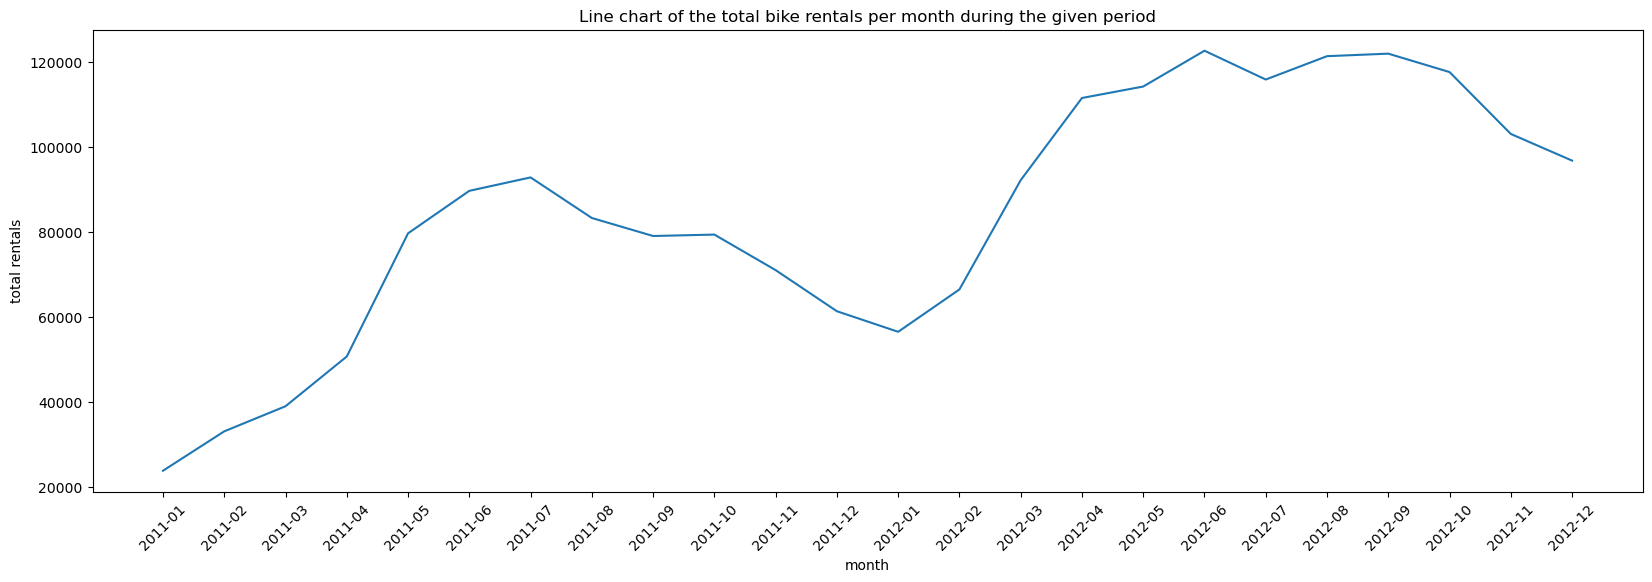

In [86]:
#Plot a line chart of the total bike rentals per month during the given period
plt.figure(figsize=(20,6))
sns.lineplot(x='period',y='rentals',data=monthly_rentals)
plt.title('Line chart of the total bike rentals per month during the given period')
plt.xlabel('month')
plt.xticks(rotation=45)
plt.ylabel('total rentals')
plt.show()

<ins>Observations</ins>
- The line chart shows time series plot of the monthly bike rentals for the years 2011 and 2012.
- There appears to be a general upward trend.
- However, there are periods where the rental volume has dropped considerably.

### Linechart of bike rentals by hour of the day

In [87]:
rentals_by_datetime=yulu_data.loc[:,['datetime','rentals']]

In [88]:
rentals_by_datetime['hour']=rentals_by_datetime['datetime'].dt.hour
rentals_by_datetime.drop('datetime',axis=1,inplace=True)

In [89]:
hourly_rentals=rentals_by_datetime.groupby('hour').aggregate('sum')
hourly_rentals.reset_index(inplace=True)
hourly_rentals

hour  rentals
0      0    25098
1      1    15436
2      2    10479
3      3     5458
4      4     3234
5      5     9058
6      6    34751
7      7    96932
8      8   152286
9      9   100910
10    10    79667
11    11    95605
12    12   115364
13    13   115289
14    14   109482
15    15   114688
16    16   142842
17    17   189800
18    18   177842
19    19   141814
20    20   104204
21    21    79036
22    22    60911
23    23    40817

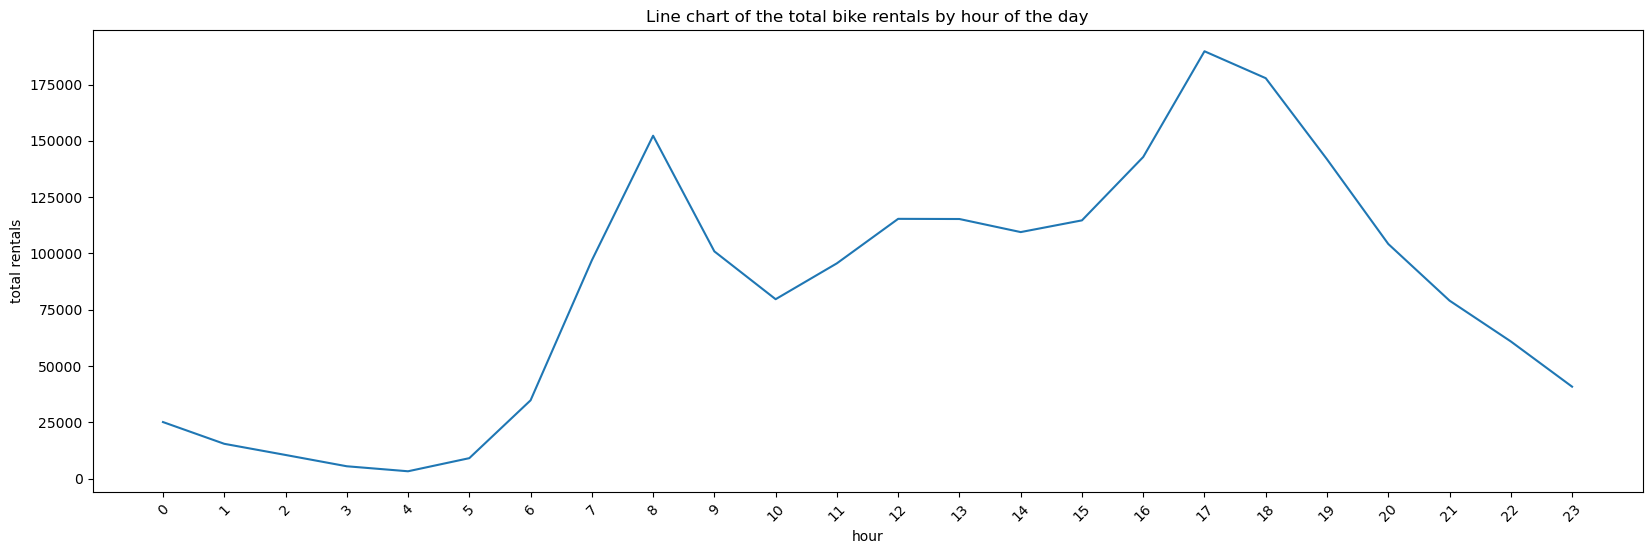

In [90]:
#Plot a line chart of the total bike rentals at each hour of the day
plt.figure(figsize=(20,6))
sns.lineplot(x='hour',y='rentals',data=hourly_rentals)
plt.title('Line chart of the total bike rentals by hour of the day')
plt.xlabel('hour')
plt.xticks(rotation=45)
plt.ylabel('total rentals')
plt.xticks(np.arange(0,24,1))
plt.show()

<ins>Observations</ins>
- The rental volumes are lower during the night as compared to the day time.
- The rental volumes peak once at round 8 am (perhaps due to people commuting to work) and again at around 5 pm (likely due to people returning home from work).

### Distribution of hourly bike rentals based on season

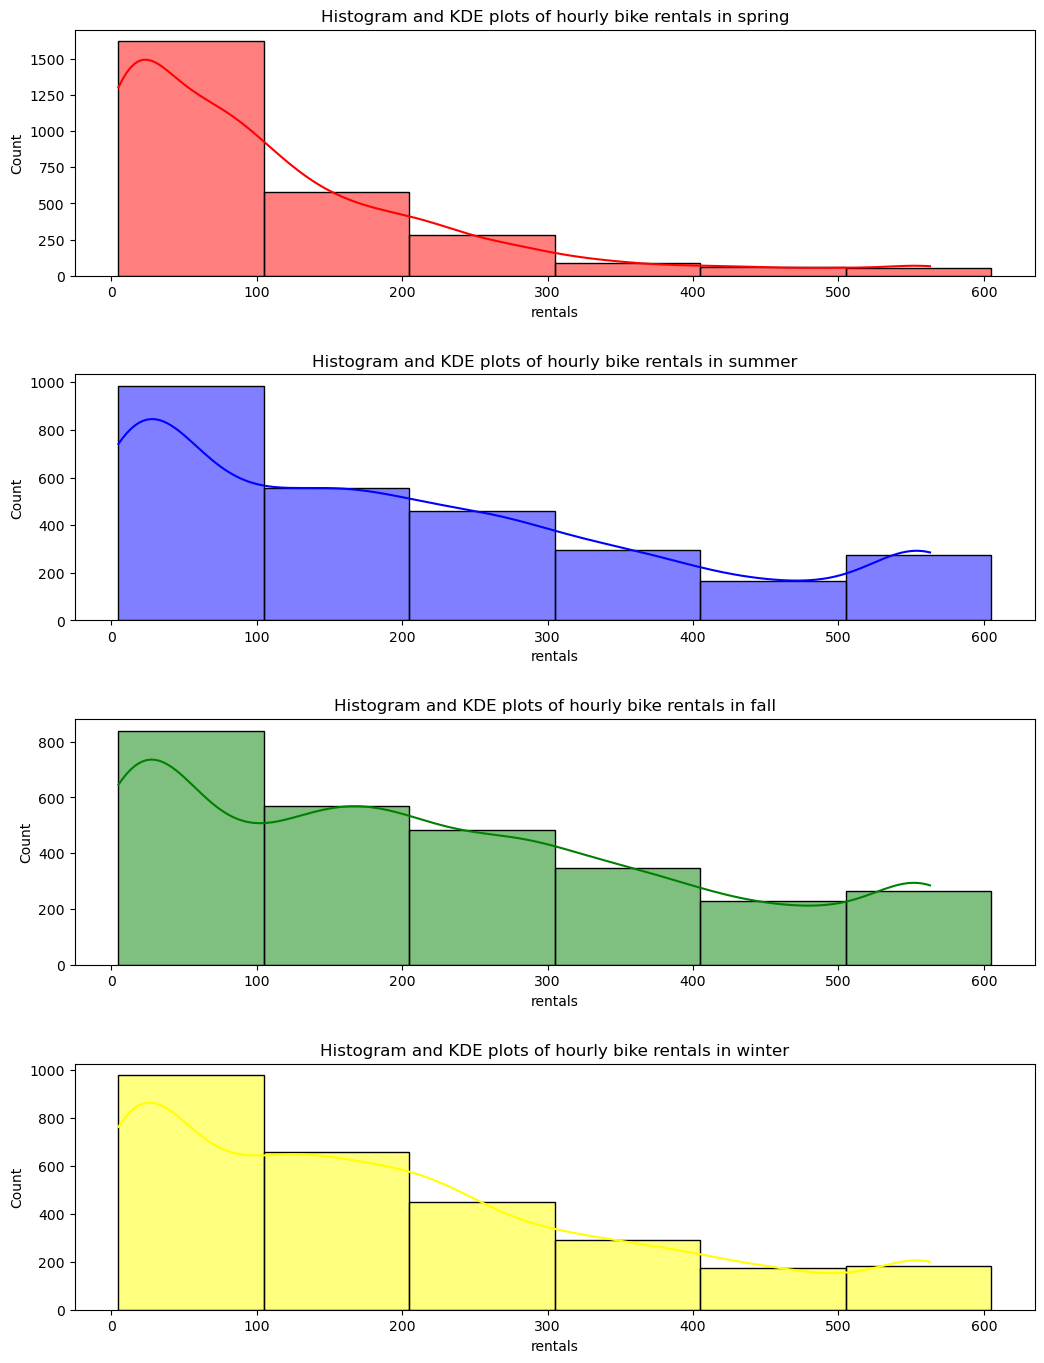

In [91]:
#Different histplots of hourly bike rentals based on season
fig,ax=plt.subplots(figsize=(12,16))

plt.subplot(4,1,1)
sns.histplot(x='rentals',data=yulu_data[yulu_data['season']==1],binwidth=100,kde=True,color='red')
plt.title('Histogram and KDE plots of hourly bike rentals in spring')

plt.subplot(4,1,2)
sns.histplot(x='rentals',data=yulu_data[yulu_data['season']==2],binwidth=100,kde=True,color='blue')
plt.title('Histogram and KDE plots of hourly bike rentals in summer')

plt.subplot(4,1,3)
sns.histplot(x='rentals',data=yulu_data[yulu_data['season']==3],binwidth=100,kde=True,color='green')
plt.title('Histogram and KDE plots of hourly bike rentals in fall')

plt.subplot(4,1,4)
sns.histplot(x='rentals',data=yulu_data[yulu_data['season']==4],binwidth=100,kde=True,color='yellow')
plt.title('Histogram and KDE plots of hourly bike rentals in winter')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.4)

plt.show()

<ins>Observations</ins>
- The histplots shown above depict a similar pattern (right-skewed) in the distribution of bike rentals across all seasons.
- The peak hourly bike rentals is <100 with progressively lesser values.
- Based on the scale of the y-axis of these graphs, there does not appear to be a drastic different in rental volumes across the different seasons.

### Distribution of hourly bike rentals based on 'holiday' variable

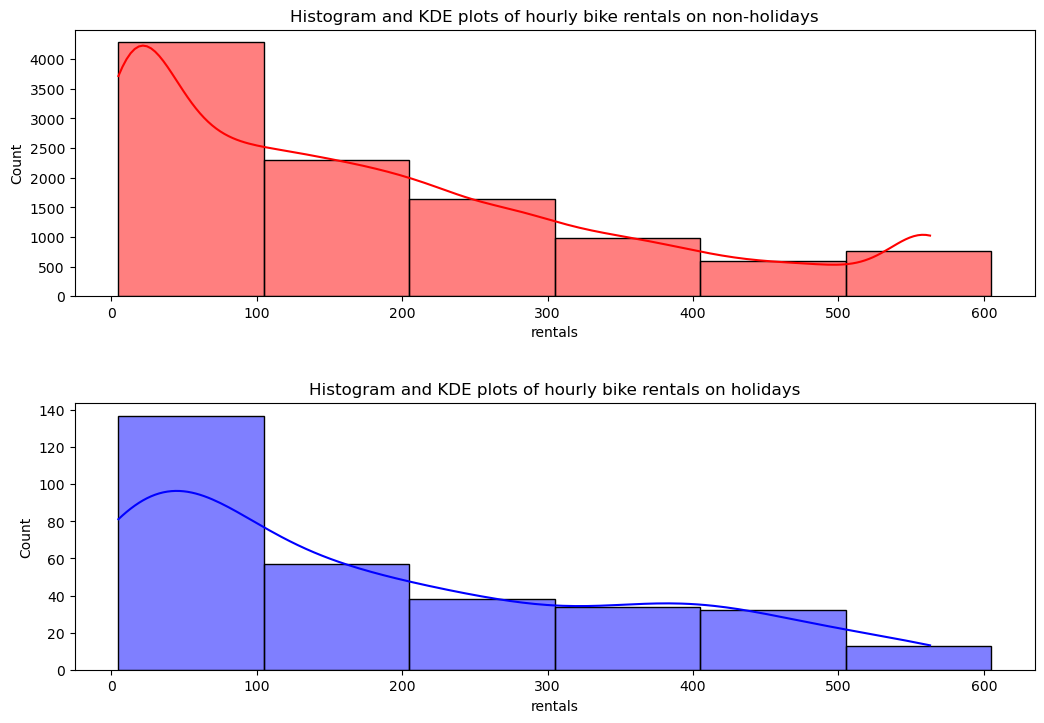

In [92]:
#Different histplots of hourly bike rentals based on 'holiday'
fig,ax=plt.subplots(figsize=(12,8))

plt.subplot(2,1,1)
sns.histplot(x='rentals',data=yulu_data[yulu_data['holiday']==0],binwidth=100,kde=True,color='red')
plt.title('Histogram and KDE plots of hourly bike rentals on non-holidays')

plt.subplot(2,1,2)
sns.histplot(x='rentals',data=yulu_data[yulu_data['holiday']==1],binwidth=100,kde=True,color='blue')
plt.title('Histogram and KDE plots of hourly bike rentals on holidays')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.4)

plt.show()

<ins>Observations</ins>
- While the histplots show a similar right-skewed distribution of rentals on non-holidays vs holidays, the rental volumes are signficantly higher for non-holdays.

### Distribution of hourly bike rentals based on 'workingday' variable

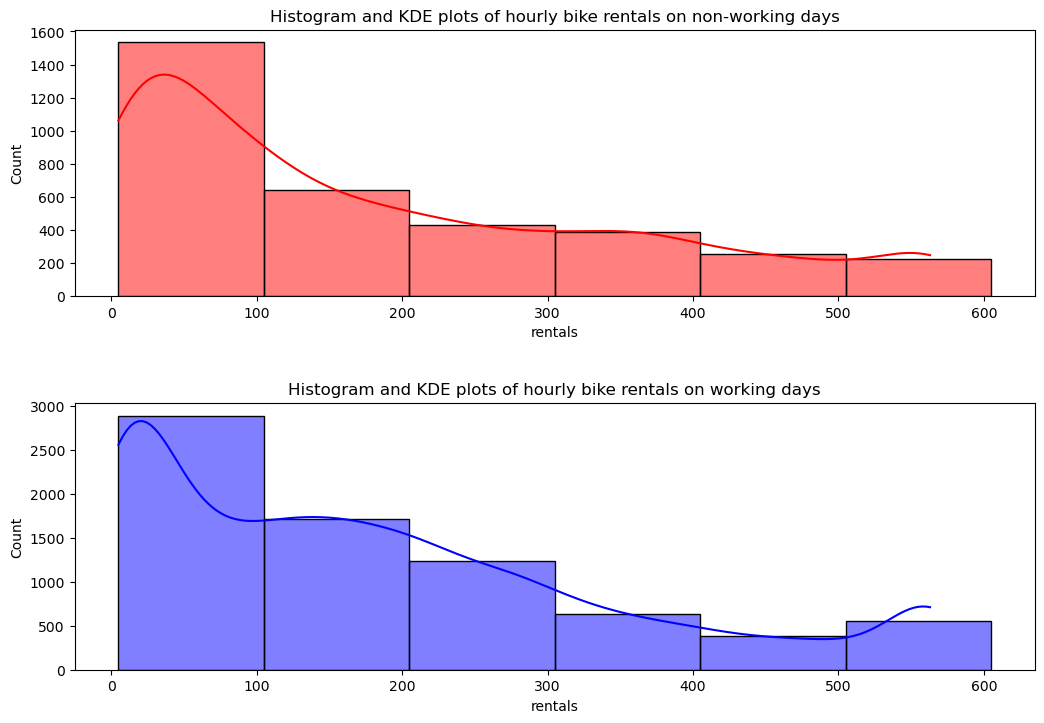

In [93]:
#Different histplots of hourly bike rentals based on 'workingday'
fig,ax=plt.subplots(figsize=(12,8))

plt.subplot(2,1,1)
sns.histplot(x='rentals',data=yulu_data[yulu_data['workingday']==0],binwidth=100,kde=True,color='red')
plt.title('Histogram and KDE plots of hourly bike rentals on non-working days')

plt.subplot(2,1,2)
sns.histplot(x='rentals',data=yulu_data[yulu_data['workingday']==1],binwidth=100,kde=True,color='blue')
plt.title('Histogram and KDE plots of hourly bike rentals on working days')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.4)

plt.show()

<ins>Observations</ins>
- While the histplots show a similar right-skewed distribution of rentals on working days vs non-working days, the rental volumes are signficantly higher on working days.

### Distribution of hourly bike rentals based on weather

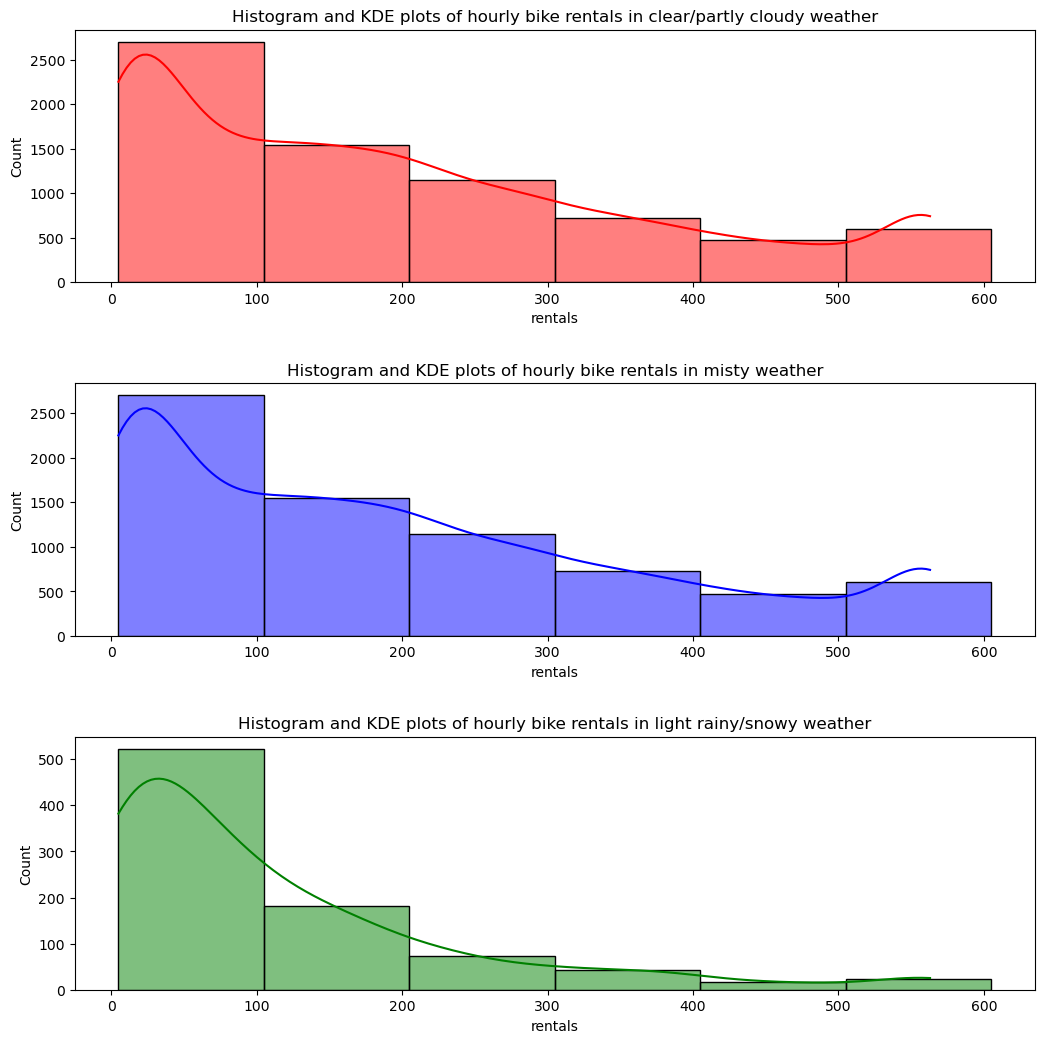

In [94]:
#Different histplots of hourly bike rentals based on weather
fig,ax=plt.subplots(figsize=(12,12))

plt.subplot(3,1,1)
sns.histplot(x='rentals',data=yulu_data[yulu_data['weather']==1],binwidth=100,kde=True,color='red')
plt.title('Histogram and KDE plots of hourly bike rentals in clear/partly cloudy weather')

plt.subplot(3,1,2)
sns.histplot(x='rentals',data=yulu_data[yulu_data['weather']==1],binwidth=100,kde=True,color='blue')
plt.title('Histogram and KDE plots of hourly bike rentals in misty weather')

plt.subplot(3,1,3)
sns.histplot(x='rentals',data=yulu_data[yulu_data['weather']==3],binwidth=100,kde=True,color='green')
plt.title('Histogram and KDE plots of hourly bike rentals in light rainy/snowy weather')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.4)

plt.show()

<ins>Observations</ins>
- There is a similar right-skewed pattern in the distribution of bike rentals per hour across all types of weather. However, the rental volumes for light rainy/snowy weather are much smaller as compared to the other two weather conditions.

---

## Test to determine if there is any significant difference between the number of bike rides on Weekdays and Weekends

### Formulate the hypotheses statements for the test

The hypotheses statements for this test are written below : \
$H_0:\mu_\text{weekdays}=\mu_\text{weekends}$\
$H_a:\mu_\text{weekdays}\ne\mu_\text{weekends}$\
</br>
where $\mu_\text{weekdays}$ & $\mu_\text{weekends}\ -$ true mean number of bike rentals on weekdays and weekends, respectively

### Select an appropriate statistical testing procedure

The set of bike rentals on weekdays and weekends are independent populations because the occurence of a bike rental on a weekday has no influence on the occurence of a bike rental on a weekend, and vice-versa. Since we are comparing the means of two independent populations, the *Independent Samples t-test* can be used in this scenario.

### Set the signficance level for the test

A signficance level of $\alpha=5\%$ is chosen to test the hypothesis.

In [95]:
#Set the significance level for the test
alpha=0.05

### Perform basic analysis of the sample data

In [96]:
#Gather the two samples
weekday_rentals=yulu_data[yulu_data["workingday"]==1].rentals
weekend_rentals=yulu_data[yulu_data["workingday"]==0].rentals

In [97]:
#Basic analysis of the sample data
print("Sample mean number of rentals on weekdays:",np.mean(weekday_rentals))
print("Sample mean number of rentals on weekednds:",np.mean(weekend_rentals))

Sample mean number of rentals on weekdays: 185.55963302752295
Sample mean number of rentals on weekednds: 185.84772596430628


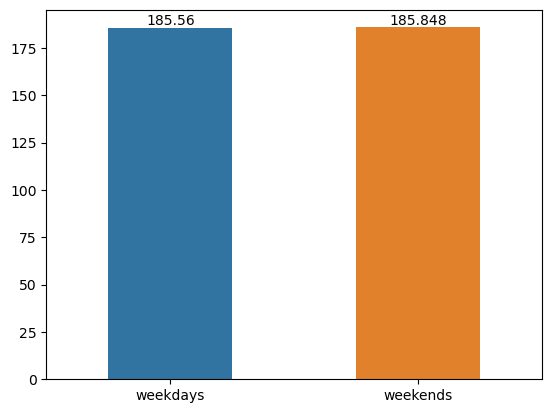

In [98]:
#Barplot of the sample mean number of rentals on weekdays and weekends
ax = sns.barplot(x=['weekdays','weekends'],y=[np.mean(weekday_rentals),np.mean(weekend_rentals)],width=0.5)
for i in ax.containers:
    ax.bar_label(i,)

### Verify the assumptions for the test

#### Normality condition

##### Analyzing histograms

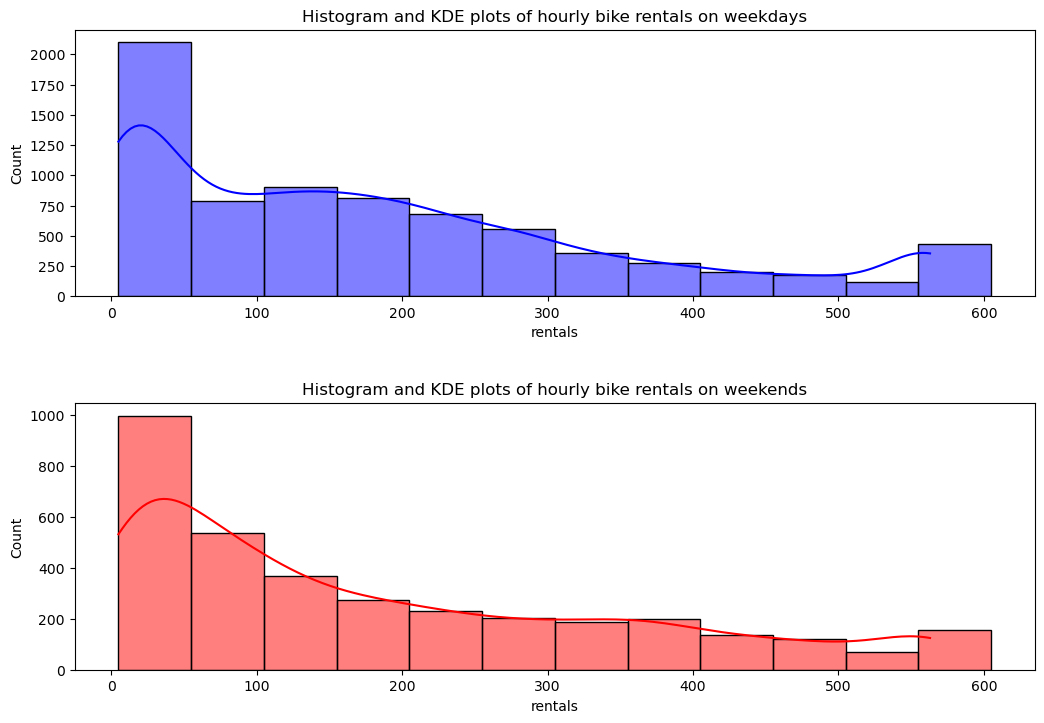

In [99]:
#Plot a histogram of the sample data sets for the number of bike rentals on weekdays and weekends
fig,ax=plt.subplots(figsize=(12,8))

plt.subplot(2,1,1)
sns.histplot(data=weekday_rentals,kde=True,binwidth=50,color='blue')
plt.title('Histogram and KDE plots of hourly bike rentals on weekdays')

plt.subplot(2,1,2)
sns.histplot(data=weekend_rentals,kde=True,binwidth=50,color='red')
plt.title('Histogram and KDE plots of hourly bike rentals on weekends')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.4)

plt.show()

An inspection of the above histograms indicates that the distributions of bike rentals on weekdays and weekends are slightly right-skewed. They do not resemble a bell-shaped (normal) curve.

##### Skewness

In [100]:
#Skewness
from scipy.stats import skew
print("Skewness for weekday data",skew(weekday_rentals))
print("Skewness for weekend data",skew(weekend_rentals))

Skewness for weekday data 0.8611292854034179
Skewness for weekend data 0.8143209613638633


The skewness measures for both weekday and weekend data are positive, with magnitudes between 0.5 and 1. This indicates a moderate level of positive skewness in their distributions

##### Q-Q Plots

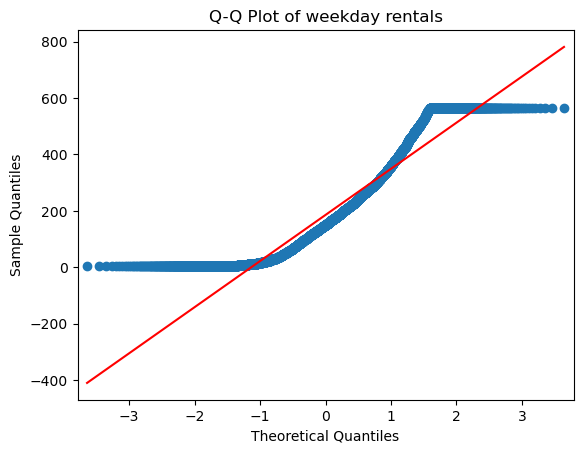

In [101]:
from statsmodels.graphics.gofplots import qqplot
qqplot(weekday_rentals, line="s")
plt.title("Q-Q Plot of weekday rentals")
plt.show()

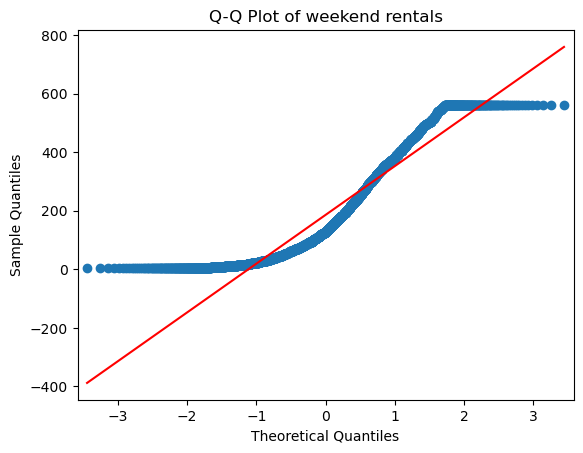

In [102]:
qqplot(weekend_rentals, line="s")
plt.title("Q-Q Plot of weekend rentals")
plt.show()

Since the scattering of points does not match the red line, it indicates that the distributions for both weekday and weekend rentals do not follow the normal distribution.

##### Shapiro-Wilk Test

$H_0$: The data is Gaussian (normally distributed)\
$H_a$: The data is not Gaussian

In [103]:
np.random.sample(42)
weekday_subset=weekday_rentals.sample(100)
weekend_subset=weekend_rentals.sample(100)

In [104]:
#Conducting the Shapiro-Wilk Test for the weekday rentals
from scipy.stats import shapiro
W_stat, p_value = shapiro(weekday_subset)
print(f"Test statistic W={W_stat}")
print(f"p-value={p_value}")

#Decision about the null hypothesis and conclusion
alpha=0.05
if p_value<=alpha:
    print("Reject H0. There is sufficient evidence to conclude that the distribution of number of bike rentals on weekdays is not Gaussian, at the 5% signficance level.")
else:
    print("Fail to reject H0. There is insufficient evidence to conclude that the distribution of number of bike rentals on weekdays is not Gaussian, at the 5% signficance level.")    

Test statistic W=0.8857768177986145
p-value=3.2127681492966076e-07
Reject H0. There is sufficient evidence to conclude that the distribution of number of bike rentals on weekdays is not Gaussian, at the 5% signficance level.


In [105]:
#Conducting the Shapiro-Wilk Test for the weekend rentals
W_stat, p_value = shapiro(weekend_subset)
print(f"Test statistic W={W_stat}")
print(f"p-value={p_value}")

#Decision about the null hypothesis and conclusion
alpha=0.05
if p_value<=alpha:
    print("Reject H0. There is sufficient evidence to conclude that the distribution of number of bike rentals on weekends is not Gaussian, at the 5% significance level.")
else:
    print("Fail to reject H0. There is insufficient evidence to conclude that the distribution of number of bike rentals on weekends is not Gaussian, at the 5% significance level.")    

Test statistic W=0.9170719385147095
p-value=9.875474461296108e-06
Reject H0. There is sufficient evidence to conclude that the distribution of number of bike rentals on weekends is not Gaussian, at the 5% significance level.


Based on these results, it can be concluded that the normality condition is not satisfied.

#### Equality of variances

##### Levene's Test for Equality of Variances

$H_0$: The population variances of the number of bike rentals on weekdays and weekends are equal.\
$H_a$: The population variances of the number of bike rentals on weekdays and weekends are different.

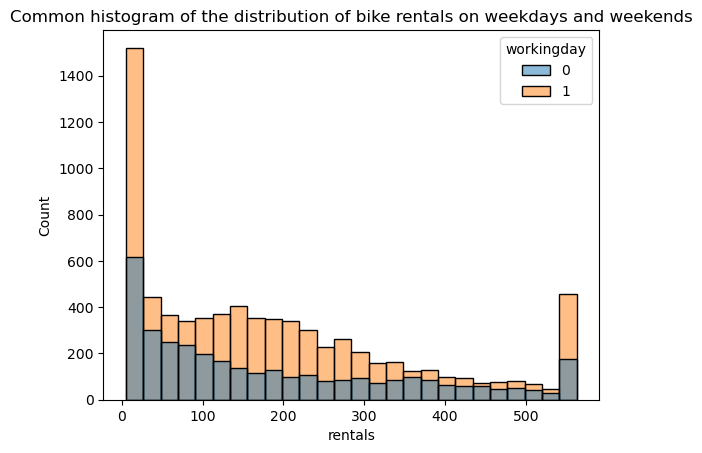

In [106]:
#Common histogram of the distribution of bike rentals on weekdays and weekends
sns.histplot(data=yulu_data,x="rentals",hue="workingday")
plt.title("Common histogram of the distribution of bike rentals on weekdays and weekends")
plt.show()

In [107]:
#Basic analysis of the sample data
from statistics import variance
print("Sample variance of the number of rentals on weekdays:",variance(weekday_rentals))
print("Sample variance of the number of rentals on weekednds:",variance(weekend_rentals))

Sample variance of the number of rentals on weekdays: 26710.41109731505
Sample variance of the number of rentals on weekednds: 27819.599322497874


In [108]:
#Conducting Levene's Test for Equality of Variances
from scipy.stats import levene
F_stat,p_value=levene(weekday_rentals,weekend_rentals)
print(f"Test statistic F={F_stat}")
print(f"p-value={p_value}")

#Decision about the null hypothesis and conclusion
alpha=0.05
if p_value<=alpha:
    print("Reject H0. There is sufficient evidence to conclude that the population variances of the number of bike rentals on weekdays and weekends are different, at the 5% significance level.")
else:
    print("Fail to reject H0. There is insufficient evidence to conclude that the population variances of the number of bike rentals on weekdays and weekends are different, at the 5% significance level.")    

Test statistic F=5.328549180981091
p-value=0.020997491495670893
Reject H0. There is sufficient evidence to conclude that the population variances of the number of bike rentals on weekdays and weekends are different, at the 5% significance level.


Based on these results, it can be concluded that the equality of variances condition is not satisfied.

### Run the Independent Samples t-test anyway - calculate the test statistic and p-value

In [109]:
#Conducting the Independent Samples t-test - determining the test statistic and p-value
from scipy.stats import ttest_ind
t_stat,p_value=ttest_ind(a=weekday_rentals,b=weekend_rentals,equal_var=True,alternative="two-sided")
print(f"Test statistic t={t_stat}")
print(f"p-value={p_value}")

Test statistic t=-0.0851691478551189
p-value=0.9321284843890086


### Make a decision about the null hypothesis and write a suitable conclusion

In [110]:
#Decision about the null hypothesis and conclusion
if p_value<=alpha:
    print("Reject H0. There is sufficient evidence to conclude that there is a significant difference between the number of bike rides on weekdays and weekends, at the 5% significance level.")
else:
    print("Fail to reject H0. There is insufficient evidence to conclude that there is a significant difference between the number of bike rides on weekdays and weekends, at the 5% significance level.")    

Fail to reject H0. There is insufficient evidence to conclude that there is a significant difference between the number of bike rides on weekdays and weekends, at the 5% significance level.


**Conclusion :**
There is insufficient evidence to conclude that there is a significant difference between the number of bike rides on weekdays and weekends, at the 5% significance level.

### Draw inferences and provide recommendations

<ins>Inferences</ins>
- It was determined that average number of bike rides on weekdays is statistically similar to the average number of bike rides on weekends.
- This means that the demand for Yulu bikes is stable and consistent throughout the week. In other words, users are likely using the service for both commuting to work (weekdays) and leisure activities (weekends). This is indicative of good market penetration.

<ins>Recommendations/actionable insights</ins>
- Since the usage is consistent throughout the week, Yulu can tailor marketing campaigns that highlight the flexibility of the service for both work and leisure purposes.
- Create specific promotions for weekends (group discounts, event tie-ins) and weekdays (commuter packages, subscription plans).
- Since there is consistent demand throughout the week, it is advisable to conduct bike maintenance or service tasks in a staggered manner rather than all at once during the weekend.

---

## Test to determine whether the demand of bicycles on rent is the same for different Weather conditions

### Formulate the hypotheses statements for the test

The hypotheses statements for this test are written below : \
$H_0:\mu_1=\mu_2=\mu_3$\
$H_a:\text{At least one of the means is different from the others}$\
</br>
where $\mu_1$, $\mu_2$ & $\mu_3 -$ true mean number of bike rentals during weather conditions 1 (clear/partly cloudy), 2 (misty), and 3 (light rain/snow), respectively\
</br>
Note : Insufficient data is available for weather condition 4 (heavy rain/snow). Hence, it is not considered for this analysis.

### Select an appropriate statistical testing procedure

The set of bike rentals during weather conditions 1, 2, and 3 are independent populations because the occurence of a bike rental during one type of weather has no influence on the occurence of a bike rental during any other type of weather, and vice-versa. Since we are comparing the means of three independent populations, the *One-way ANOVA test* can be used in this scenario.

### Set the signficance level for the test

A signficance level of $\alpha=5\%$ is chosen to test the hypothesis.

In [111]:
#Set the significance level for the test
alpha=0.05

### Perform basic analysis of the sample data

In [112]:
#Dropping the row with weather=4
yulu_data=yulu_data.drop(yulu_data[yulu_data["weather"]==4].index)
yulu_data["weather"]=yulu_data["weather"].astype('object')
yulu_data["weather"]=yulu_data["weather"].astype('category')

In [113]:
#Gather the three samples
weather1_rentals=yulu_data[yulu_data["weather"]==1].rentals
weather2_rentals=yulu_data[yulu_data["weather"]==2].rentals
weather3_rentals=yulu_data[yulu_data["weather"]==3].rentals

In [114]:
#Basic analysis of the sample data
print("Sample mean number of rentals on during weather condition 1:",np.mean(weather1_rentals))
print("Sample mean number of rentals on during weather condition 2:",np.mean(weather2_rentals))
print("Sample mean number of rentals on during weather condition 3:",np.mean(weather3_rentals))

Sample mean number of rentals on during weather condition 1: 198.24304783092325
Sample mean number of rentals on during weather condition 2: 174.6697247706422
Sample mean number of rentals on during weather condition 3: 116.48544819557625


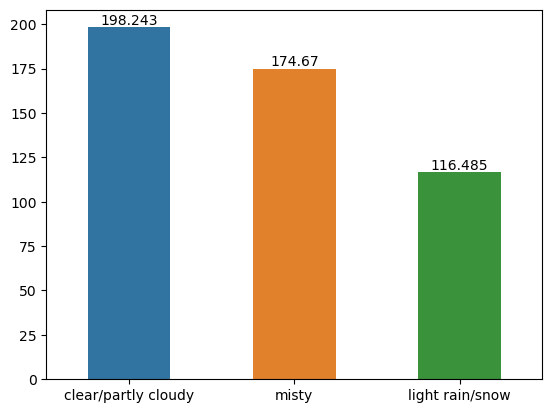

In [115]:
#Barplot of the sample mean number of rentals on weekdays and weekends
ax = sns.barplot(x=['clear/partly cloudy','misty','light rain/snow'],
                 y=[np.mean(weather1_rentals),np.mean(weather2_rentals),np.mean(weather3_rentals)],
                 width=0.5)
for i in ax.containers:
    ax.bar_label(i,)

### Verify the assumptions for the test

#### Normality condition

##### Analyzing histograms

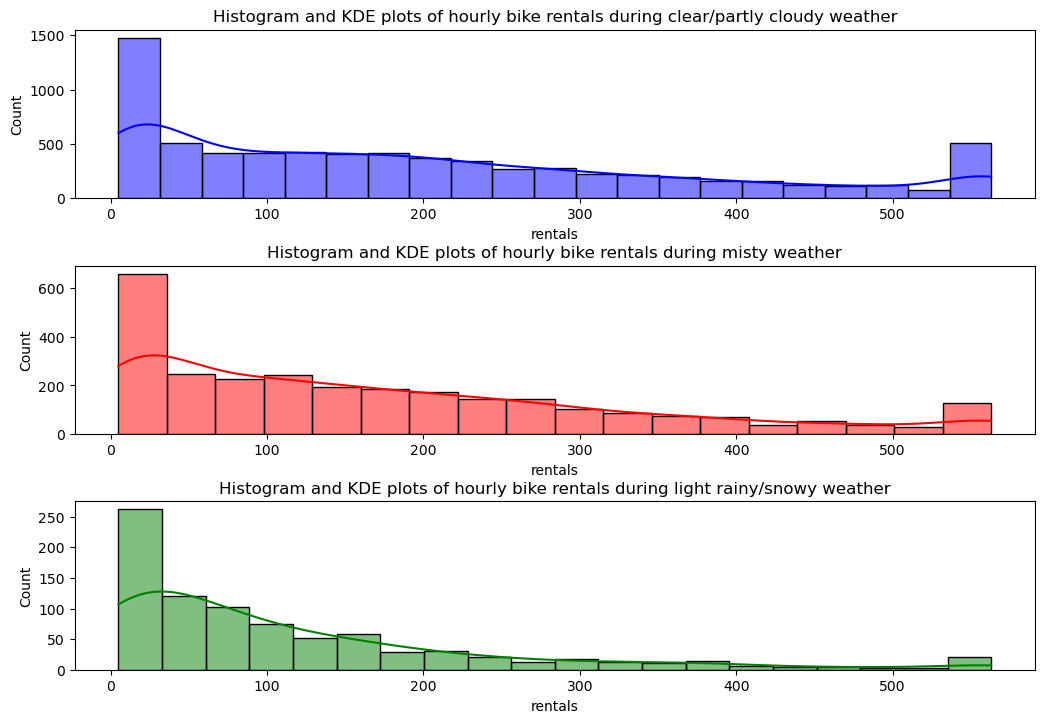

In [116]:
#Plot a histogram of the sample data sets for the number of bike rentals during each type of weather
fig,ax=plt.subplots(figsize=(12,8))

plt.subplot(3,1,1)
sns.histplot(data=weather1_rentals,kde=True,color='blue')
plt.title('Histogram and KDE plots of hourly bike rentals during clear/partly cloudy weather')

plt.subplot(3,1,2)
sns.histplot(data=weather2_rentals,kde=True,color='red')
plt.title('Histogram and KDE plots of hourly bike rentals during misty weather')

plt.subplot(3,1,3)
sns.histplot(data=weather3_rentals,kde=True,color='green')
plt.title('Histogram and KDE plots of hourly bike rentals during light rainy/snowy weather')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.4)

plt.show()

An inspection of the above histograms indicates that the distributions of bike rentals during weather conditions 1, 2, and 3 are right-skewed. They do not resemble a bell-shaped (normal) curve.

##### Skewness

In [117]:
#Skewness
print("Skewness for weather 1 data",skew(weather1_rentals))
print("Skewness for weather 2 data",skew(weather2_rentals))
print("Skewness for weather 3 data",skew(weather3_rentals))

Skewness for weather 1 data 0.7345734649120512
Skewness for weather 2 data 0.9275857540748085
Skewness for weather 3 data 1.696503876920216


The skewness measures for all three weather conditions are positive. This means that they are all right-skewed. While the data for weather conditions 1 and 2 exhibit a moderate level of skewness, there is a fairly high degree of skewness in the data for weather condition 3. 

##### Q-Q Plots

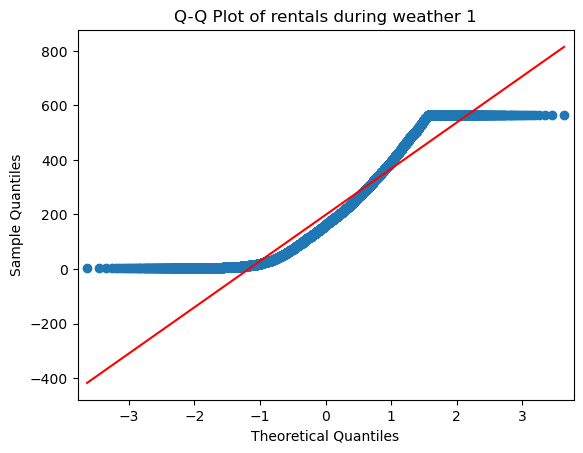

In [118]:
qqplot(weather1_rentals, line="s")
plt.title("Q-Q Plot of rentals during weather 1")
plt.show()

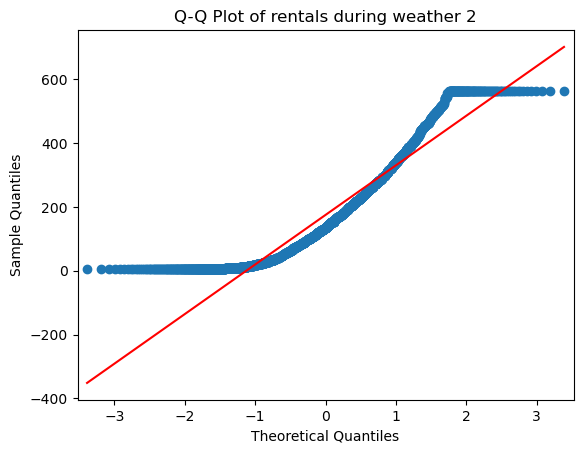

In [119]:
qqplot(weather2_rentals, line="s")
plt.title("Q-Q Plot of rentals during weather 2")
plt.show()

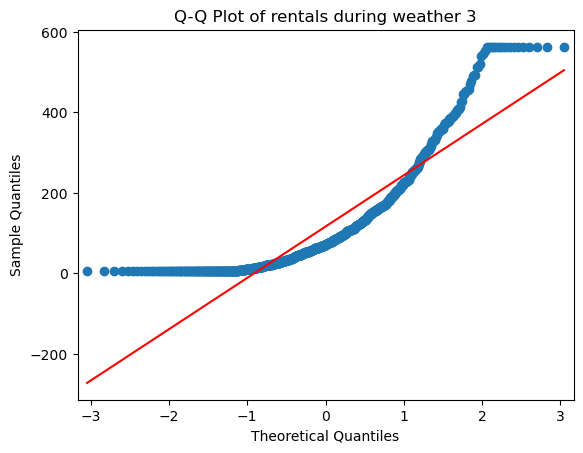

In [120]:
qqplot(weather3_rentals, line="s")
plt.title("Q-Q Plot of rentals during weather 3")
plt.show()

The scattering of points in all three plots do not match the red line, with the third plot showing maximum deviation. This indicates that the distributions for all three weather conditions do not follow the normal distribution.

##### Shapiro-Wilk Test

$H_0$: The data is Gaussian (normally distributed)\
$H_a$: The data is not Gaussian

In [121]:
np.random.sample(42)
weather1_subset=weather1_rentals.sample(100)
weather2_subset=weather2_rentals.sample(100)
weather3_subset=weather3_rentals.sample(100)

In [122]:
#Conducting the Shapiro-Wilk Test for the weather 1 rentals
W_stat, p_value = shapiro(weather1_subset)
print(f"Test statistic W={W_stat}")
print(f"p-value={p_value}")

#Decision about the null hypothesis and conclusion
alpha=0.05
if p_value<=alpha:
    print("Reject H0. There is sufficient evidence to conclude that the distribution of number of bike rentals during clear/partly cloudy weather is not Gaussian, at the 5% signficance level.")
else:
    print("Fail to reject H0. There is insufficient evidence to conclude that the distribution of number of bike rentals during clear/partly cloudy weather is not Gaussian, at the 5% signficance level.")    

Test statistic W=0.8974348902702332
p-value=1.0731004067565664e-06
Reject H0. There is sufficient evidence to conclude that the distribution of number of bike rentals during clear/partly cloudy weather is not Gaussian, at the 5% signficance level.


In [123]:
#Conducting the Shapiro-Wilk Test for the weather 2 rentals
W_stat, p_value = shapiro(weather2_subset)
print(f"Test statistic W={W_stat}")
print(f"p-value={p_value}")

#Decision about the null hypothesis and conclusion
alpha=0.05
if p_value<=alpha:
    print("Reject H0. There is sufficient evidence to conclude that the distribution of number of bike rentals during misty weather is not Gaussian, at the 5% signficance level.")
else:
    print("Fail to reject H0. There is insufficient evidence to conclude that the distribution of number of bike rentals during misty weather is not Gaussian, at the 5% signficance level.")    

Test statistic W=0.8501814603805542
p-value=1.2043420483109912e-08
Reject H0. There is sufficient evidence to conclude that the distribution of number of bike rentals during misty weather is not Gaussian, at the 5% signficance level.


In [124]:
#Conducting the Shapiro-Wilk Test for the weather 3 rentals
W_stat, p_value = shapiro(weather3_subset)
print(f"Test statistic W={W_stat}")
print(f"p-value={p_value}")

#Decision about the null hypothesis and conclusion
alpha=0.05
if p_value<=alpha:
    print("Reject H0. There is sufficient evidence to conclude that the distribution of number of bike rentals during light rainy/snowy weather is not Gaussian, at the 5% signficance level.")
else:
    print("Fail to reject H0. There is insufficient evidence to conclude that the distribution of number of bike rentals during light rainy/snowy weather is not Gaussian, at the 5% signficance level.")    

Test statistic W=0.784295916557312
p-value=8.38669064751052e-11
Reject H0. There is sufficient evidence to conclude that the distribution of number of bike rentals during light rainy/snowy weather is not Gaussian, at the 5% signficance level.


Based on these results, it can be concluded that the normality condition is not satisfied.

#### Equality of variances

##### Levene's Test for Equality of Variances

$H_0$: The population variances of the number of bike rentals during weather conditions 1, 2, and 3 are equal.\
$H_a$: At least one of the population variances is different from the others.

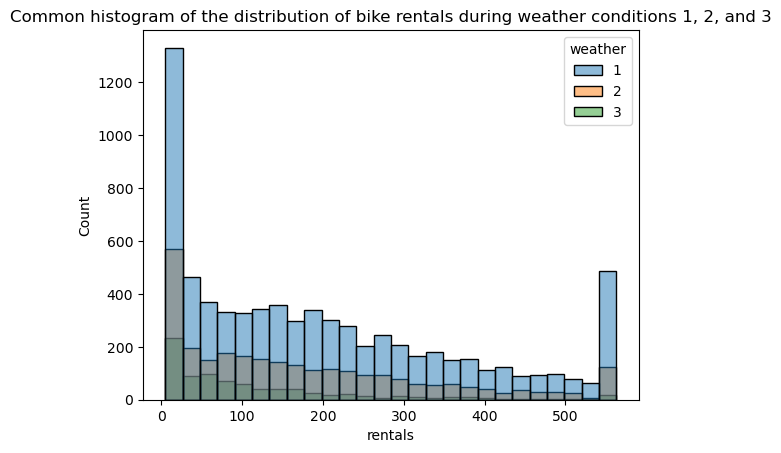

In [125]:
#Common histogram of the distribution of bike rentals during weather conditions 1, 2, and 3
sns.histplot(data=yulu_data,x="rentals",hue="weather")
plt.title("Common histogram of the distribution of bike rentals during weather conditions 1, 2, and 3")
plt.show()

In [126]:
#Basic analysis of the sample data
print("Sample variance of the number of rentals during weather condition 1:",variance(weather1_rentals))
print("Sample variance of the number of rentals during weather condition 2:",variance(weather2_rentals))
print("Sample variance of the number of rentals during weather condition 3:",variance(weather3_rentals))

Sample variance of the number of rentals during weather condition 1: 28734.061904101174
Sample variance of the number of rentals during weather condition 2: 24128.167618208725
Sample variance of the number of rentals during weather condition 3: 16311.023972147372


In [127]:
#Conducting Levene's Test for Equality of Variances
F_stat,p_value=levene(weather1_rentals,weather2_rentals,weather3_rentals)
print(f"Test statistic F={F_stat}")
print(f"p-value={p_value}")

#Decision about the null hypothesis and conclusion
alpha=0.05
if p_value<=alpha:
    print("Reject H0. There is sufficient evidence to conclude that the population variances of the number of bike rentals during different weather conditions are not all equal, at the 5% significance level.")
else:
    print("Fail to reject H0. There is insufficient evidence to conclude that the population variances of the number of bike rentals during different weather conditions are not all equal, at the 5% significance level.")    

Test statistic F=94.62752975218469
p-value=1.807422632075508e-41
Reject H0. There is sufficient evidence to conclude that the population variances of the number of bike rentals during different weather conditions are not all equal, at the 5% significance level.


Based on these results, it can be concluded that the equality of variances condition is not satisfied.

### Run the One-way ANOVA test anyway - calculate the test statistic and p-value

In [128]:
#Conducting the One-way ANOVA test - determining the test statistic and p-value
from scipy.stats import f_oneway
F_stat,p_value=f_oneway(weather1_rentals,weather2_rentals,weather3_rentals)
print(f"Test statistic F={F_stat}")
print(f"p-value={p_value}")

Test statistic F=105.27880946222714
p-value=5.1845480685533955e-46


### Make a decision about the null hypothesis and write a suitable conclusion

In [129]:
#Decision about the null hypothesis and conclusion
if p_value<=alpha:
    print("Reject H0. There is sufficient evidence to conclude that the true mean number of bike rentals is not the same across all weather conditions, at the 5% significance level.")
else:
    print("Fail to reject H0. There is insufficient evidence to conclude that the true mean number of bike rentals is not the same across all weather conditions, at the 5% significance level.")    

Reject H0. There is sufficient evidence to conclude that the true mean number of bike rentals is not the same across all weather conditions, at the 5% significance level.


**Conclusion :**
There is sufficient evidence to conclude that the demand for bikes is not the same across all weather conditions, at the 5% significance level.

### Draw inferences and provide recommendations

<ins>Inferences</ins>
- The ANOVA results show that weather conditions significantly affect the demand for bike rentals. This implies that users' behavior changes based on the weather.
- Based on the sample data, it is clear that the demand was maximum during clear/partly cloudy weather. Typically, these are favorable weather conditions that encourage more bike rentals.
- Misty weather saw the second highest average rentals as the demand depends on the visibility and comfort level.
- Light rainy or snowy weather are less conducive to bike rentals as riders are exposed to the elements. This is reflected by the lowest sample average rentals during this weather.

<ins>Recommendations/actionable insights</ins>
- Implement dynamic pricing to offer discounts during misty or light rainy/snowy weather to incentivize users. For instance, providing discounts or offers during less favorable weather can help maintain demand.
- Slightly increase prices during clear/partly cloudy days when the demand is naturally higher to maximize revenue.
- Use the mobile app to send notifications about special offers during adverse weather conditions to encourage usage.
- Collect feedback specifically related to riding in different weather conditions to understand user concerns and preferences.

---

## Test to determine whether the demand of bicycles on rent is the same for different Seasons

### Formulate the hypotheses statements for the test

The hypotheses statements for this test are written below : \
$H_0:\mu_1=\mu_2=\mu_3=\mu_4$\
$H_a:\text{At least one of the means is different from the others}$\
</br>
where $\mu_1$, $\mu_2$, $\mu_3$ & $\mu_4 -$ true mean number of bike rentals during spring, summer, fall, and winter, respectively

### Select an appropriate statistical testing procedure

The set of bike rentals during seasons 1, 2, 3, and 4 are independent populations because the occurence of a bike rental on during one type of weather has no influence on the occurence of a bike rental during any other type of weather, and vice-versa. Since we are comparing the means of four independent populations, the *One-way ANOVA test* can be used in this scenario.

### Set the signficance level for the test

A signficance level of $\alpha=5\%$ is chosen to test the hypothesis.

In [130]:
#Set the significance level for the test
alpha=0.05

### Perform basic analysis of the sample data

In [131]:
#Gather the four samples
season1_rentals=yulu_data[yulu_data["season"]==1].rentals
season2_rentals=yulu_data[yulu_data["season"]==2].rentals
season3_rentals=yulu_data[yulu_data["season"]==3].rentals
season4_rentals=yulu_data[yulu_data["season"]==4].rentals

In [132]:
#Basic analysis of the sample data
print("Sample mean number of rentals on during spring:",np.mean(season1_rentals))
print("Sample mean number of rentals on during summer:",np.mean(season2_rentals))
print("Sample mean number of rentals on during fall:",np.mean(season3_rentals))
print("Sample mean number of rentals on during winter:",np.mean(season4_rentals))

Sample mean number of rentals on during spring: 115.57914338919926
Sample mean number of rentals on during summer: 207.80497621661178
Sample mean number of rentals on during fall: 224.61178192462495
Sample mean number of rentals on during winter: 193.38478419897586


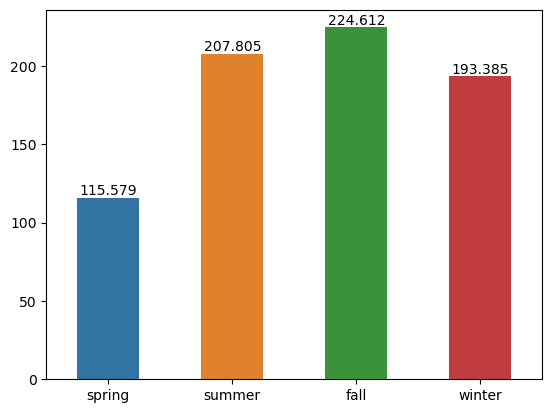

In [133]:
#Barplot of the sample mean number of rentals in spring, summer, fall, and winter
ax = sns.barplot(x=['spring','summer','fall','winter'],
                 y=[np.mean(season1_rentals),np.mean(season2_rentals),np.mean(season3_rentals),np.mean(season4_rentals)],
                 width=0.5)
for i in ax.containers:
    ax.bar_label(i,)

### Verify the assumptions for the test

#### Normality condition

##### Analyzing histograms

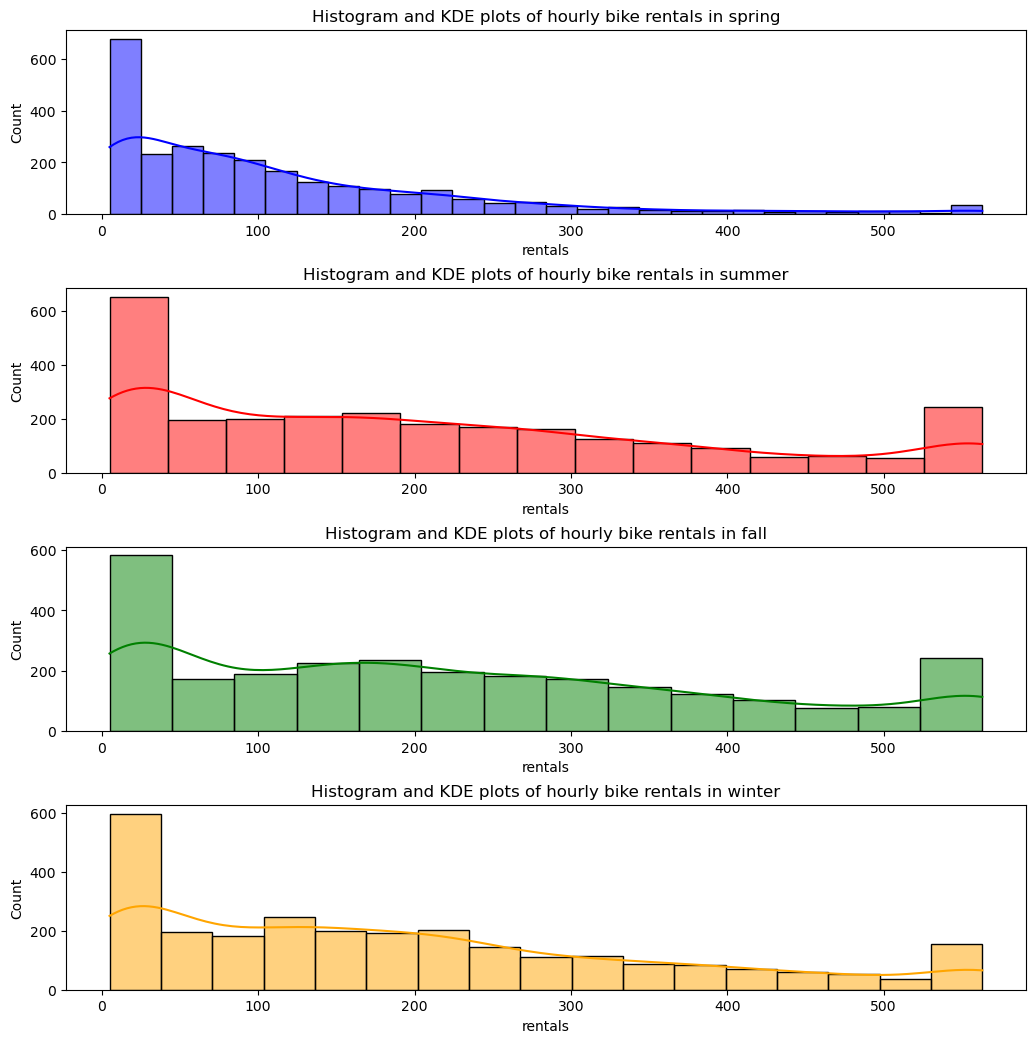

In [134]:
#Plot a histogram of the sample data sets for the number of bike rentals during each season
fig,ax=plt.subplots(figsize=(12,12))

plt.subplot(4,1,1)
sns.histplot(data=season1_rentals,kde=True,color='blue')
plt.title('Histogram and KDE plots of hourly bike rentals in spring')

plt.subplot(4,1,2)
sns.histplot(data=season2_rentals,kde=True,color='red')
plt.title('Histogram and KDE plots of hourly bike rentals in summer')

plt.subplot(4,1,3)
sns.histplot(data=season3_rentals,kde=True,color='green')
plt.title('Histogram and KDE plots of hourly bike rentals in fall')

plt.subplot(4,1,4)
sns.histplot(data=season4_rentals,kde=True,color='orange')
plt.title('Histogram and KDE plots of hourly bike rentals in winter')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.4)

plt.show()

An inspection of the above histograms indicates that the distributions of bike rentals in each of the seasons are right-skewed. They do not resemble a bell-shaped (normal) curve.

##### Skewness

In [135]:
#Skewness
print("Skewness for spring data",skew(season1_rentals))
print("Skewness for summer data",skew(season2_rentals))
print("Skewness for fall data",skew(season3_rentals))
print("Skewness for winter data",skew(season4_rentals))

Skewness for spring data 1.6622076320594297
Skewness for summer data 0.6597467169042951
Skewness for fall data 0.49350737629117575
Skewness for winter data 0.7569081604797824


The skewness measures for all four seasons are positive. This means that they are all right-skewed. The data for weather spring shows a high level of skewness, while the data for the remaining seasons exhibit a low to moderate level.

##### Q-Q Plots

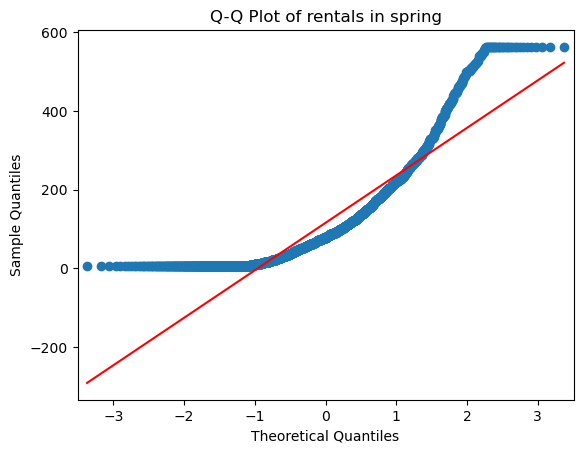

In [136]:
qqplot(season1_rentals, line="s")
plt.title("Q-Q Plot of rentals in spring")
plt.show()

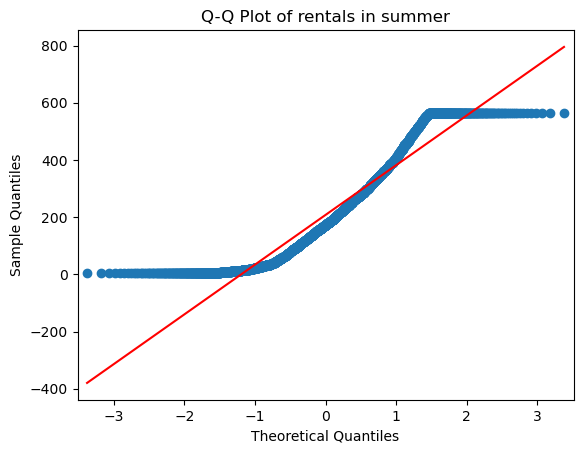

In [137]:
qqplot(season2_rentals, line="s")
plt.title("Q-Q Plot of rentals in summer")
plt.show()

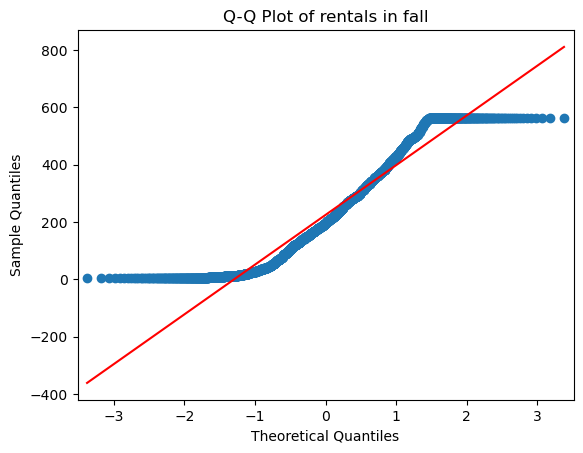

In [138]:
qqplot(season3_rentals, line="s")
plt.title("Q-Q Plot of rentals in fall")
plt.show()

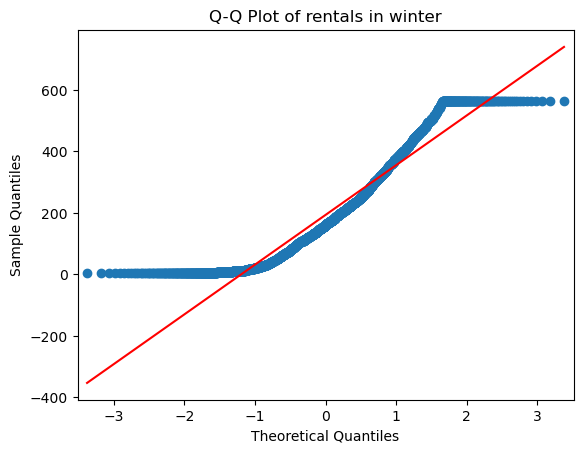

In [139]:
qqplot(season4_rentals, line="s")
plt.title("Q-Q Plot of rentals in winter")
plt.show()

The scattering of points in all three plots do not match the red line, with the first plot (for spring) showing maximum deviation. This indicates that the distributions for all four seasons do not follow the normal distribution.

##### Shapiro-Wilk Test

$H_0$: The data is Gaussian (normally distributed)\
$H_a$: The data is not Gaussian

In [140]:
np.random.sample(42)
season1_subset=season1_rentals.sample(100)
season2_subset=season2_rentals.sample(100)
season3_subset=season3_rentals.sample(100)
season4_subset=season4_rentals.sample(100)

In [141]:
#Conducting the Shapiro-Wilk Test for spring rentals
W_stat, p_value = shapiro(season1_subset)
print(f"Test statistic W={W_stat}")
print(f"p-value={p_value}")

#Decision about the null hypothesis and conclusion
alpha=0.05
if p_value<=alpha:
    print("Reject H0. There is sufficient evidence to conclude that the distribution of number of bike rentals in spring is not Gaussian, at the 5% signficance level.")
else:
    print("Fail to reject H0. There is insufficient evidence to conclude that the distribution of number of bike rentals in spring is not Gaussian, at the 5% signficance level.")    

Test statistic W=0.8755961656570435
p-value=1.1870589844420465e-07
Reject H0. There is sufficient evidence to conclude that the distribution of number of bike rentals in spring is not Gaussian, at the 5% signficance level.


In [142]:
#Conducting the Shapiro-Wilk Test for summer rentals
W_stat, p_value = shapiro(season2_subset)
print(f"Test statistic W={W_stat}")
print(f"p-value={p_value}")

#Decision about the null hypothesis and conclusion
alpha=0.05
if p_value<=alpha:
    print("Reject H0. There is sufficient evidence to conclude that the distribution of number of bike rentals in summer is not Gaussian, at the 5% signficance level.")
else:
    print("Fail to reject H0. There is insufficient evidence to conclude that the distribution of number of bike rentals in summer is not Gaussian, at the 5% signficance level.")    

Test statistic W=0.9276161193847656
p-value=3.654255488072522e-05
Reject H0. There is sufficient evidence to conclude that the distribution of number of bike rentals in summer is not Gaussian, at the 5% signficance level.


In [143]:
#Conducting the Shapiro-Wilk Test for fall rentals
W_stat, p_value = shapiro(season3_subset)
print(f"Test statistic W={W_stat}")
print(f"p-value={p_value}")

#Decision about the null hypothesis and conclusion
alpha=0.05
if p_value<=alpha:
    print("Reject H0. There is sufficient evidence to conclude that the distribution of number of bike rentals in fall is not Gaussian, at the 5% signficance level.")
else:
    print("Fail to reject H0. There is insufficient evidence to conclude that the distribution of number of bike rentals in fall is not Gaussian, at the 5% signficance level.")    

Test statistic W=0.8981493711471558
p-value=1.1583047125895973e-06
Reject H0. There is sufficient evidence to conclude that the distribution of number of bike rentals in fall is not Gaussian, at the 5% signficance level.


In [144]:
#Conducting the Shapiro-Wilk Test for winter rentals
W_stat, p_value = shapiro(season4_subset)
print(f"Test statistic W={W_stat}")
print(f"p-value={p_value}")

#Decision about the null hypothesis and conclusion
alpha=0.05
if p_value<=alpha:
    print("Reject H0. There is sufficient evidence to conclude that the distribution of number of bike rentals in winter is not Gaussian, at the 5% signficance level.")
else:
    print("Fail to reject H0. There is insufficient evidence to conclude that the distribution of number of bike rentals in winter is not Gaussian, at the 5% signficance level.")    

Test statistic W=0.9139744639396667
p-value=6.836826742073754e-06
Reject H0. There is sufficient evidence to conclude that the distribution of number of bike rentals in winter is not Gaussian, at the 5% signficance level.


Based on these results, it can be concluded that the normality condition is not satisfied.

#### Equality of variances

##### Levene's Test for Equality of Variances

$H_0$: The population variances of the number of bike rentals in spring, summer, fall and winter are equal.\
$H_a$: At least one of the population variances is different from the others.

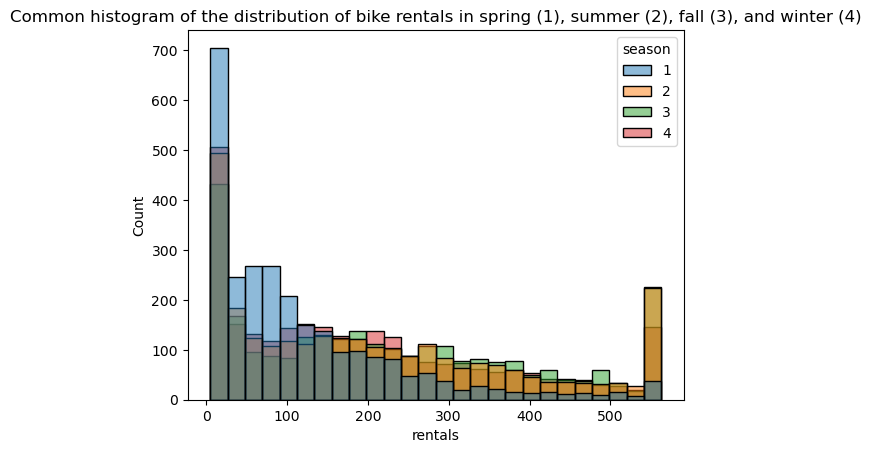

In [145]:
#Common histogram of the distribution of bike rentals in summaer, summer, fall, and winter
sns.histplot(data=yulu_data,x="rentals",hue="season")
plt.title("Common histogram of the distribution of bike rentals in spring (1), summer (2), fall (3), and winter (4)")
plt.show()

In [146]:
#Basic analysis of the sample data
print("Sample variance of the number of rentals in spring:",variance(season1_rentals))
print("Sample variance of the number of rentals in summer:",variance(season2_rentals))
print("Sample variance of the number of rentals in fall:",variance(season3_rentals))
print("Sample variance of the number of rentals in winter:",variance(season4_rentals))

Sample variance of the number of rentals in spring: 14578.446509698135
Sample variance of the number of rentals in summer: 30276.597749752364
Sample variance of the number of rentals in fall: 30109.075805498545
Sample variance of the number of rentals in winter: 26208.89250165484


In [147]:
#Conducting Levene's Test for Equality of Variances
F_stat,p_value=levene(season1_rentals,season2_rentals,season3_rentals,season4_rentals)
print(f"Test statistic F={F_stat}")
print(f"p-value={p_value}")

#Decision about the null hypothesis and conclusion
alpha=0.05
if p_value<=alpha:
    print("Reject H0. There is sufficient evidence to conclude that the population variances of the number of bike rentals in the different seasons are not all equal, at the 5% significance level.")
else:
    print("Fail to reject H0. There is insufficient evidence to conclude that the population variances of the number of bike rentals in the different seasons are not all equal, at the 5% significance level.")    

Test statistic F=209.58396500877532
p-value=3.6057526761146575e-132
Reject H0. There is sufficient evidence to conclude that the population variances of the number of bike rentals in the different seasons are not all equal, at the 5% significance level.


Based on these results, it can be concluded that the equality of variances condition is not satisfied.

### Run the One-way ANOVA test anyway - calculate the test statistic and p-value

In [148]:
#Conducting the One-way ANOVA test - determining the test statistic and p-value
F_stat,p_value=f_oneway(season1_rentals,season2_rentals,season3_rentals,season4_rentals)
print(f"Test statistic F={F_stat}")
print(f"p-value={p_value}")

Test statistic F=247.78334234657123
p-value=1.5211265194665906e-155


### Make a decision about the null hypothesis and write a suitable conclusion

In [149]:
#Decision about the null hypothesis and conclusion
if p_value<=alpha:
    print("Reject H0. There is sufficient evidence to conclude that the true mean number of bike rentals is not the same across the different seasons, at the 5% significance level.")
else:
    print("Fail to reject H0. There is insufficient evidence to conclude that the true mean number of bike rentals is not the same across the different seasons, at the 5% significance level.")    

Reject H0. There is sufficient evidence to conclude that the true mean number of bike rentals is not the same across the different seasons, at the 5% significance level.


**Conclusion :**
There is sufficient evidence to conclude that the demand for bikes is not the same across the different seasons, at the 5% significance level.

### Draw inferences and provide recommendations

<ins>Inferences</ins>
- The test results indicate significant differences in bike rental demand across the four seasons, which means seasonal factors play a crucial role in influencing users' bike rental behavior.
- Based on the sample data, the order of average bike rentals according to season is $\text{fall}>\text{summer}>\text{winter}>\text{spring}$.

<ins>Recommendations/actionable insights</ins>
- Implement higher pricing during high-demand seasons like summer and fall to maximize revenue.
- Offer discounts and promotions during spring to stimulate demand and balance usage throughout the year.
- Schedule regular maintenance checks and necessary upgrades before peak seasons to ensure all bikes are in optimal condition.
- Introduce incentives such as loyalty programs or referral bonuses to encourage users to rent bikes during spring and winter.
- Perform further analysis to understand underlying factors contributing to seasonal variations, such as holidays, school vacations, and weather conditions.

---

## Test to determine if the Weather conditions are significantly different during different Seasons

### Formulate the hypotheses statements for the test

The hypotheses statements for this test are written below : \
$H_0$: The weather conditions are independent of the season\
$H_a$: The weather conditions are dependent on the season

### Select an appropriate statistical testing procedure

Since both 'weather' and 'season' are categorical variables, and the goal of this analysis is to determine whether there is an association between them, the *Chi-square Test for Independence* can be used in this scenario.\
</br>
Note : The weather condition 4 is ignored because there is only a single observation for this value.

### Create a Contingency Table of ‘Weather’ v/s ‘Season’

In [150]:
#Create a Contingency Table of ‘weather’ v/s ‘season’
contingencytable_ws=pd.crosstab(index=yulu_data['weather'],columns=yulu_data['season'])
contingencytable_ws

season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225

### Set the signficance level for the test

A signficance level of $\alpha=5\%$ is chosen to test the hypothesis.

In [151]:
#Set the significance level for the test
alpha=0.05

### Run the Chi-square Test for Independence - calculate the test statistic and p-value

In [152]:
#Conducting the Chi-square Test for Independence - determining the test statistic and p-value
from scipy.stats import chi2_contingency
chisq_stat, p_value, df, exp_freq = chi2_contingency(observed=contingencytable_ws)
print(f"Test statistic ={chisq_stat}")
print(f"p-value={p_value}")

Test statistic =46.101457310732485
p-value=2.8260014509929403e-08


### Make a decision about the null hypothesis and write a suitable conclusion

In [153]:
#Decision about the null hypothesis and conclusion
if p_value<=alpha:
    print("Reject H0. There is sufficient evidence to conclude that the weather conditions are significantly different during different seasons, at the 5% significance level.")
else:
    print("Fail to reject H0. There is insufficient evidence to conclude that the weather conditions are significantly different during different seasons, at the 5% significance level.")    

Reject H0. There is sufficient evidence to conclude that the weather conditions are significantly different during different seasons, at the 5% significance level.


**Conclusion :**
There is sufficient evidence to conclude that the weather conditions are significantly different during different seasons, at the 5% significance level.

### Draw inferences and provide recommendations

<ins>Inferences</ins>
- The significant result of the Chi-Square Test for Independence suggests that weather conditions are not evenly distributed across the seasons. This means that certain weather conditions are more likely to occur in specific seasons.

<ins>Recommendations/actionable insights</ins>
- Allocate more bikes during seasons with predominantly clear/partly cloudy weather (summer and fall) to meet the higher expected demand.
- Plan for more maintenance activities during spring and winter, when misty and light rainy/snowy conditions are more frequent, to ensure bikes are well-maintained and safe.
- Implement dynamic pricing to offer discounts during misty or light rainy/snowy weather conditions to incentivize users.
- Conduct in-depth analysis of historical weather trends and their impact on bike rentals to forecast demand and prepare accordingly.

---
---